[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

# 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE  
* 국내 통계 > 주제별 통계 > 도소매, 서비스 > 온라인쇼핑 동향조사 > 지역별/상품군별 온라인쇼핑 해외직접판매액  

## 목차
1. 검증 목표 : K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
2. 필요한 라이브러리 가져오기
3. 한글폰트 설정
4. 데이터 로드하기
5. 분석과 시각화를 위한 Tidy data 만들기
6. 데이터 전처리
7. K-Beauty 판매액 시각화
8. 결론 : 전체 상품군별로 온라인 쇼핑 해외직접판매액은 증가했을까?
9. 회고

## 1. 검증 목표 : K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

### 기타 참조 링크
- [통계별 설명 자료 조회](https://www.k-stat.go.kr/metasvc/msba100/statsdcdta?orgId=101&statsConfmNo=101056&kosisYn=Y)
- [보도자료: 2019년 온라인쇼핑 18% 증가](https://world.kbs.co.kr/service/news_view.htm?lang=k&Seq_Code=346701)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. 필요 라이브러리 가져오기

In [2]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3. 한글폰트 설정
* https://github.com/ychoi-kr/koreanize-matplotlib

- 방법1 : os 별로 폰트를 다르게 설정하기

In [3]:
# 시각화를 위한 폰트 설정
import os

os.name

'posix'

In [4]:
# os 별로 폰트를 다르게 설정하기
if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

- 방법2

In [5]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서는 아래 모듈을 설치하고 불러와서 사용하세요.

!pip install koreanize-matplotlib

import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.6 MB/s eta 0:00:00


In [6]:
# 레티나 설정 : 폰트(글씨)를 선명하게
%config InlineBackend.figure_format = 'retina'

## 4. 데이터 로드하기

In [7]:
%ls data

ls: cannot access 'data': No such file or directory


In [8]:
# 현재 경로 확인
os.getcwd()

'/content'

In [9]:
from glob import glob

glob("data/*.csv")

[]

-> 현재 작업 디렉토리가 /content 라서 data폴더 내의 csv 파일이 없다고 뜬다. (빈 리스트로 표현됨)  
현재 작업중인 디렉토리로 이동한다

In [10]:
# 현재 작업중인 디렉토리로 이동
os.chdir('/content/drive/MyDrive/AI/naver_coaching_study_2024/week04/')

os.getcwd()

'/content/drive/MyDrive/AI/naver_coaching_study_2024/week04'

In [11]:
# data디렉토리 파일 리스트 확인하기
from glob import glob

glob("data/*.csv")

['data/online_oversea_202210.csv',
 'data/online_oversea_20142019.csv',
 'data/online_oversea_2022.csv']

In [12]:
# df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_202002.csv",
#                      encoding="cp949")
df_raw = pd.read_csv("data/online_oversea_2022.csv",
                     encoding="cp949")
df_raw.shape

(450, 27)

In [ ]:
df_raw

국가(대륙)별          상품군별   판매유형별 2014.1/4 2014.2/4 2014.3/4 2014.4/4  \
0        합계            합계       계   148272   153641   163999   213216   
1        합계            합계     면세점        -        -        -        -   
2        합계            합계  면세점 이외        -        -        -        -   
3        합계    컴퓨터 및 주변기기       계     4915     4052     3912     3529   
4        합계    컴퓨터 및 주변기기     면세점        -        -        -        -   
..      ...           ...     ...      ...      ...      ...      ...   
445      기타  생활용품 및 자동차용품     면세점        -        -        -        -   
446      기타  생활용품 및 자동차용품  면세점 이외        -        -        -        -   
447      기타           기 타       계      765      735      849      804   
448      기타           기 타     면세점        -        -        -        -   
449      기타           기 타  면세점 이외        -        -        -        -   

    2015.1/4 2015.2/4 2015.3/4  ... 2017.3/4 2017.4/4 2018.1/4 2018.2/4  \
0     269101   271784   268421  ...   755101   858240   833672   897205   
1          -        -        -  ...   610630   677884   665613   725319   
2          -        -        -  ...   144471   180356   168059   171886   
3       2903     2697     3804  ...     2032     2158     5236     3854   
4          -        -        -  ...        5        1        2        6   
..       ...      ...      ...  ...      ...      ...      ...      ...   
445        -        -        -  ...        0        0        0        0   
446        -        -        -  ...      581      634      665      469   
447      788      805      724  ...      816     1101     1067     1063   
448        -        -        -  ...       82      266      272      316   
449        -        -        -  ...      734      835      795      747   

    2018.3/4  2018.4/4  2019.1/4  2019.2/4  2019.3/4  2019.4/4  
0     921586    974060   1251122   1345723   1526135   1881628  
1     761836    770656   1070693   1157158   1336372   1655635  
2     159750    203404    180429    188565    189763    225993  
3       4320      4511      3702      4038      3670      3827  
4          1       215         2         0         1        70  
..       ...       ...       ...       ...       ...       ...  
445        0         0         0         0         0         0  
446      504       589       465       488       308       531  
447     1120       770       711       689       469      1094  
448      404         0         0         1         0         1  
449      716       770       711       688       469      1093  

[450 rows x 27 columns]

In [ ]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

국가(대륙)별
합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: count, dtype: int64

In [ ]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"]

국가(대륙)별          상품군별   판매유형별 2014.1/4 2014.2/4 2014.3/4 2014.4/4 2015.1/4  \
45      미국            합계       계    25773    22573    21288    26729    39945   
46      미국            합계     면세점        -        -        -        -        -   
47      미국            합계  면세점 이외        -        -        -        -        -   
48      미국    컴퓨터 및 주변기기       계     2216     1666     1776     1675     1469   
49      미국    컴퓨터 및 주변기기     면세점        -        -        -        -        -   
50      미국    컴퓨터 및 주변기기  면세점 이외        -        -        -        -        -   
51      미국    가전·전자·통신기기       계     2875     2758     2894     3527     4397   
52      미국    가전·전자·통신기기     면세점        -        -        -        -        -   
53      미국    가전·전자·통신기기  면세점 이외        -        -        -        -        -   
54      미국         소프트웨어       계       47       57       49      128      182   
55      미국         소프트웨어     면세점        -        -        -        -        -   
56      미국         소프트웨어  면세점 이외        -        -        -        -        -   
57      미국           서 적       계      962      720      934     1006     1074   
58      미국           서 적     면세점        -        -        -        -        -   
59      미국           서 적  면세점 이외        -        -        -        -        -   
60      미국         사무·문구       계       25       10       14       18      568   
61      미국         사무·문구     면세점        -        -        -        -        -   
62      미국         사무·문구  면세점 이외        -        -        -        -        -   
63      미국     음반·비디오·악기       계      787      720      722      821      849   
64      미국     음반·비디오·악기     면세점        -        -        -        -        -   
65      미국     음반·비디오·악기  면세점 이외        -        -        -        -        -   
66      미국  의류 및 패션 관련상품       계     9810     7801     6404     9208     8602   
67      미국  의류 및 패션 관련상품     면세점        -        -        -        -        -   
68      미국  의류 및 패션 관련상품  면세점 이외        -        -        -        -        -   
69      미국      스포츠·레저용품       계      573      539      475      491      541   
70      미국      스포츠·레저용품     면세점        -        -        -        -        -   
71      미국      스포츠·레저용품  면세점 이외        -        -        -        -        -   
72      미국           화장품       계     3740     3713     3399     4595    11223   
73      미국           화장품     면세점        -        -        -        -        -   
74      미국           화장품  면세점 이외        -        -        -        -        -   
75      미국       아동·유아용품       계      583      546      499      610     1099   
76      미국       아동·유아용품     면세점        -        -        -        -        -   
77      미국       아동·유아용품  면세점 이외        -        -        -        -        -   
78      미국         음·식료품       계      381      415      405      673      577   
79      미국         음·식료품     면세점        -        -        -        -        -   
80      미국         음·식료품  면세점 이외        -        -        -        -        -   
81      미국         농축수산물       계       94       98      111      160      189   
82      미국         농축수산물     면세점        -        -        -        -        -   
83      미국         농축수산물  면세점 이외        -        -        -        -        -   
84      미국  생활용품 및 자동차용품       계     1931     1915     1815     1871     6605   
85      미국  생활용품 및 자동차용품     면세점        -        -        -        -        -   
86      미국  생활용품 및 자동차용품  면세점 이외        -        -        -        -        -   
87      미국           기 타       계     1749     1615     1791     1946     2570   
88      미국           기 타     면세점        -        -        -        -        -   
89      미국           기 타  면세점 이외        -        -        -        -        -   

   2015.2/4 2015.3/4  ... 2017.3/4 2017.4/4 2018.1/4 2018.2/4 2018.3/4  \
45    26654    28647  ...    42331    53209    42679    40207    37631   
46        -        -  ...     9469    12177     5184     3603     2317   
47        -        -  ...    32862    41032    37495  

## 5. 분석과 시각화를 위한 Tidy data 만들기

- Tidy dataset이란 분석하기 좋은 형태로 구성된 데이터셋을 의미한다.
- https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

### df.melt(df)
- 데이터를 재구조화하는 함수. column에 있는 데이터(값들)를 row로 옮기는 것.
    - id_vars : id값으로 사용할 열을 지정
    - value_vars :
        - id_vars에 들어가지 않은 컬럼들은 value_vars로 포함된다.
        - value_vars에 들어간 컬럼들은 variable이라는 컬럼의 값들로 들어간다.
        - variable 컬럼 값 각각에 해당하는 값들은 value라는 컬럼의 값으로 들어간다.

In [ ]:
# df.melt 도움말
df_raw.melt?

In [ ]:
# 컬럼명 확인하기
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4'],
      dtype='object')

In [ ]:
# "국가(대륙)별", "상품군별", "판매유형별" 를 컬럼으로 설정
df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"])

국가(대륙)별          상품군별   판매유형별  variable   value
0          합계            합계       계  2014.1/4  148272
1          합계            합계     면세점  2014.1/4       -
2          합계            합계  면세점 이외  2014.1/4       -
3          합계    컴퓨터 및 주변기기       계  2014.1/4    4915
4          합계    컴퓨터 및 주변기기     면세점  2014.1/4       -
...       ...           ...     ...       ...     ...
10795      기타  생활용품 및 자동차용품     면세점  2019.4/4       0
10796      기타  생활용품 및 자동차용품  면세점 이외  2019.4/4     531
10797      기타           기 타       계  2019.4/4    1094
10798      기타           기 타     면세점  2019.4/4       1
10799      기타           기 타  면세점 이외  2019.4/4    1093

[10800 rows x 5 columns]

-> "국가(대륙)별", "상품군별", "판매유형별" 뿐만 아니라 variable, value도 컬럼에 있다.  
variable은 원래 컬럼에 있던 연도별 분기이고, value는 어떤 값인지 확인해본다.

In [ ]:
# values 확인하기
df_raw.values

array([['합계', '합계', '계', ..., 1345723, 1526135, 1881628],
       ['합계', '합계', '면세점', ..., 1157158, 1336372, 1655635],
       ['합계', '합계', '면세점 이외', ..., 188565, 189763, 225993],
       ...,
       ['기타', '기 타', '계', ..., 689, 469, 1094],
       ['기타', '기 타', '면세점', ..., 1, 0, 1],
       ['기타', '기 타', '면세점 이외', ..., 688, 469, 1093]], dtype=object)

-> id_vars만 지정하면 나머지 컬럼들이 자동으로 value_vars에 지정된다.  

In [ ]:
# variable을 "기간"으로 변경하기 : var_name을 활용
df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간")

국가(대륙)별          상품군별   판매유형별        기간   value
0          합계            합계       계  2014.1/4  148272
1          합계            합계     면세점  2014.1/4       -
2          합계            합계  면세점 이외  2014.1/4       -
3          합계    컴퓨터 및 주변기기       계  2014.1/4    4915
4          합계    컴퓨터 및 주변기기     면세점  2014.1/4       -
...       ...           ...     ...       ...     ...
10795      기타  생활용품 및 자동차용품     면세점  2019.4/4       0
10796      기타  생활용품 및 자동차용품  면세점 이외  2019.4/4     531
10797      기타           기 타       계  2019.4/4    1094
10798      기타           기 타     면세점  2019.4/4       1
10799      기타           기 타  면세점 이외  2019.4/4    1093

[10800 rows x 5 columns]

In [13]:
# value를 "백만원"으로 설정하기 (value가 백만원 단위이므로) : value_name을 활용
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"],
                 var_name="기간", value_name="백만원")
df

국가(대륙)별          상품군별   판매유형별        기간     백만원
0          합계            합계       계  2014.1/4  148272
1          합계            합계     면세점  2014.1/4       -
2          합계            합계  면세점 이외  2014.1/4       -
3          합계    컴퓨터 및 주변기기       계  2014.1/4    4915
4          합계    컴퓨터 및 주변기기     면세점  2014.1/4       -
...       ...           ...     ...       ...     ...
10795      기타  생활용품 및 자동차용품     면세점  2019.4/4       0
10796      기타  생활용품 및 자동차용품  면세점 이외  2019.4/4     531
10797      기타           기 타       계  2019.4/4    1094
10798      기타           기 타     면세점  2019.4/4       1
10799      기타           기 타  면세점 이외  2019.4/4    1093

[10800 rows x 5 columns]

In [ ]:
df.shape

(10800, 5)

In [ ]:
df.head()

국가(대륙)별        상품군별   판매유형별        기간     백만원
0      합계          합계       계  2014.1/4  148272
1      합계          합계     면세점  2014.1/4       -
2      합계          합계  면세점 이외  2014.1/4       -
3      합계  컴퓨터 및 주변기기       계  2014.1/4    4915
4      합계  컴퓨터 및 주변기기     면세점  2014.1/4       -

-> 합계 값이 많이 보인다. 전처리가 필요하다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


-> info() 내용 확인 및 전처리 할 항목
- 모든 data type이 object이다.
    - 기간 컬럼의 연도와 분기를 분류하기
    - 백만원 컬럼의 data type을 숫자로 바꾸기

## 6. 데이터 전처리
### 기간에서 연도를 분리하기

In [ ]:
# 기간 확인하기
df["기간"]

0        2014.1/4
1        2014.1/4
2        2014.1/4
3        2014.1/4
4        2014.1/4
           ...   
10795    2019.4/4
10796    2019.4/4
10797    2019.4/4
10798    2019.4/4
10799    2019.4/4
Name: 기간, Length: 10800, dtype: object

In [ ]:
# 기간에서 연도 분리하기 : split으로 연도와 분기 구분
"	2019.4/4".split(".")

['\t2019', '4/4']

In [ ]:
# 연도만 출력
"	2019.4/4".split(".")[0]

'\t2019'

In [ ]:
# 연도의 데이터 타입 확인
type("	2019.4/4".split(".")[0])

str

In [ ]:
# 연도를 str -> int로 변경하기
int("	2019.4/4".split(".")[0])

2019

In [14]:
# 기간 컬럼 값들에서 연도 분리하기
df['연도'] = df['기간'].map(lambda x : int(x.split(".")[0]))
df.head()

국가(대륙)별        상품군별   판매유형별        기간     백만원    연도
0      합계          합계       계  2014.1/4  148272  2014
1      합계          합계     면세점  2014.1/4       -  2014
2      합계          합계  면세점 이외  2014.1/4       -  2014
3      합계  컴퓨터 및 주변기기       계  2014.1/4    4915  2014
4      합계  컴퓨터 및 주변기기     면세점  2014.1/4       -  2014

-> 데이터프레임(df)에 '연도'라는 컬럼이 생겼다.

In [ ]:
# '기간'에서 분기만 분리하기
df['기간'].map(lambda x : int(x.split(".")[1].split("/")[0]))

0        1
1        1
2        1
3        1
4        1
        ..
10795    4
10796    4
10797    4
10798    4
10799    4
Name: 기간, Length: 10800, dtype: int64

In [15]:
# '기간'에서 분기 값만 분리하여 '분기' 컬럼 만들기
df['분기'] = df['기간'].map(lambda x : int(x.split(".")[1].split("/")[0]))
df.head()

국가(대륙)별        상품군별   판매유형별        기간     백만원    연도  분기
0      합계          합계       계  2014.1/4  148272  2014   1
1      합계          합계     면세점  2014.1/4       -  2014   1
2      합계          합계  면세점 이외  2014.1/4       -  2014   1
3      합계  컴퓨터 및 주변기기       계  2014.1/4    4915  2014   1
4      합계  컴퓨터 및 주변기기     면세점  2014.1/4       -  2014   1

### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기
- 금액(백만원 컬럼)에서 dash(-)는 결측치이다.
- 데이터 타입을 변경하기 위해 결측치 '-'를 NaN으로 변경한다.

In [16]:
# 결측치(-)를 NaN으로 바꾸기
df["백만원"].replace("-", np.nan)

0        148272
1           NaN
2           NaN
3          4915
4           NaN
          ...  
10795         0
10796       531
10797      1094
10798         1
10799      1093
Name: 백만원, Length: 10800, dtype: object

In [17]:
# "백만원" 컬럼 값의 데이터 타입 변경 : str -> float
df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df["백만원"]

0        148272.0
1             NaN
2             NaN
3          4915.0
4             NaN
           ...   
10795         0.0
10796       531.0
10797      1094.0
10798         1.0
10799      1093.0
Name: 백만원, Length: 10800, dtype: float64

In [ ]:
df.head()

국가(대륙)별        상품군별   판매유형별        기간       백만원    연도  분기
0      합계          합계       계  2014.1/4  148272.0  2014   1
1      합계          합계     면세점  2014.1/4       NaN  2014   1
2      합계          합계  면세점 이외  2014.1/4       NaN  2014   1
3      합계  컴퓨터 및 주변기기       계  2014.1/4    4915.0  2014   1
4      합계  컴퓨터 및 주변기기     면세점  2014.1/4       NaN  2014   1

-> "백만원" 컬럼의 값들이 float 타입으로 변경되었다.

### 필요없는 데이터 제거하기

In [18]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
# df["국가(대륙)별"] != "합계"
# df["상품군별"] != "합계"

df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")]

국가(대륙)별          상품군별   판매유형별        기간     백만원    연도  분기
48         미국    컴퓨터 및 주변기기       계  2014.1/4  2216.0  2014   1
49         미국    컴퓨터 및 주변기기     면세점  2014.1/4     NaN  2014   1
50         미국    컴퓨터 및 주변기기  면세점 이외  2014.1/4     NaN  2014   1
51         미국    가전·전자·통신기기       계  2014.1/4  2875.0  2014   1
52         미국    가전·전자·통신기기     면세점  2014.1/4     NaN  2014   1
...       ...           ...     ...       ...     ...   ...  ..
10795      기타  생활용품 및 자동차용품     면세점  2019.4/4     0.0  2019   4
10796      기타  생활용품 및 자동차용품  면세점 이외  2019.4/4   531.0  2019   4
10797      기타           기 타       계  2019.4/4  1094.0  2019   4
10798      기타           기 타     면세점  2019.4/4     1.0  2019   4
10799      기타           기 타  면세점 이외  2019.4/4  1093.0  2019   4

[9072 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


-> 메모리 사용량 memory usage: 590.8+ KB

In [19]:
# 합계 데이터를 제거한 데이터프레임을 복사하고, 메모리 변화 확인하기
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df

국가(대륙)별          상품군별   판매유형별        기간     백만원    연도  분기
48         미국    컴퓨터 및 주변기기       계  2014.1/4  2216.0  2014   1
49         미국    컴퓨터 및 주변기기     면세점  2014.1/4     NaN  2014   1
50         미국    컴퓨터 및 주변기기  면세점 이외  2014.1/4     NaN  2014   1
51         미국    가전·전자·통신기기       계  2014.1/4  2875.0  2014   1
52         미국    가전·전자·통신기기     면세점  2014.1/4     NaN  2014   1
...       ...           ...     ...       ...     ...   ...  ..
10795      기타  생활용품 및 자동차용품     면세점  2019.4/4     0.0  2019   4
10796      기타  생활용품 및 자동차용품  면세점 이외  2019.4/4   531.0  2019   4
10797      기타           기 타       계  2019.4/4  1094.0  2019   4
10798      기타           기 타     면세점  2019.4/4     1.0  2019   4
10799      기타           기 타  면세점 이외  2019.4/4  1093.0  2019   4

[9072 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


-> 합계 데이터를 제거하니 memory usage가 590.8+ KB에서 567.0+ KB 로 줄어들었다.

In [ ]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

-> "백만원" 컬럼에 결측치 (금액이 없는) 가 3024개 있다.

In [ ]:
# "계"만 숫자 데이터가 있고, 나머지 "면세점", "면세점 이외" 행의 2016년 이전 값들은 결측치(-)가 있으므로
# df["판매유형별"] != "계"

## 7. K-Beauty 판매액 시각화
### 전체 상품군 판매액 시각화

In [ ]:
df

국가(대륙)별          상품군별   판매유형별        기간     백만원    연도  분기
48         미국    컴퓨터 및 주변기기       계  2014.1/4  2216.0  2014   1
49         미국    컴퓨터 및 주변기기     면세점  2014.1/4     NaN  2014   1
50         미국    컴퓨터 및 주변기기  면세점 이외  2014.1/4     NaN  2014   1
51         미국    가전·전자·통신기기       계  2014.1/4  2875.0  2014   1
52         미국    가전·전자·통신기기     면세점  2014.1/4     NaN  2014   1
...       ...           ...     ...       ...     ...   ...  ..
10795      기타  생활용품 및 자동차용품     면세점  2019.4/4     0.0  2019   4
10796      기타  생활용품 및 자동차용품  면세점 이외  2019.4/4   531.0  2019   4
10797      기타           기 타       계  2019.4/4  1094.0  2019   4
10798      기타           기 타     면세점  2019.4/4     1.0  2019   4
10799      기타           기 타  면세점 이외  2019.4/4  1093.0  2019   4

[9072 rows x 7 columns]

-> '판매유형별' == '계'인 값만 '백만원' 컬럼값들이 결측치가 아닌 숫자 값이 들어있다.

In [20]:
# '판매유형별' == '계'인 값만 확인하기
df_total = df[df['판매유형별'] == '계'].copy()
df_total

국가(대륙)별          상품군별 판매유형별        기간     백만원    연도  분기
48         미국    컴퓨터 및 주변기기     계  2014.1/4  2216.0  2014   1
51         미국    가전·전자·통신기기     계  2014.1/4  2875.0  2014   1
54         미국         소프트웨어     계  2014.1/4    47.0  2014   1
57         미국           서 적     계  2014.1/4   962.0  2014   1
60         미국         사무·문구     계  2014.1/4    25.0  2014   1
...       ...           ...   ...       ...     ...   ...  ..
10785      기타       아동·유아용품     계  2019.4/4   193.0  2019   4
10788      기타         음·식료품     계  2019.4/4   319.0  2019   4
10791      기타         농축수산물     계  2019.4/4     2.0  2019   4
10794      기타  생활용품 및 자동차용품     계  2019.4/4   531.0  2019   4
10797      기타           기 타     계  2019.4/4  1094.0  2019   4

[3024 rows x 7 columns]

<Axes: xlabel='연도', ylabel='백만원'>

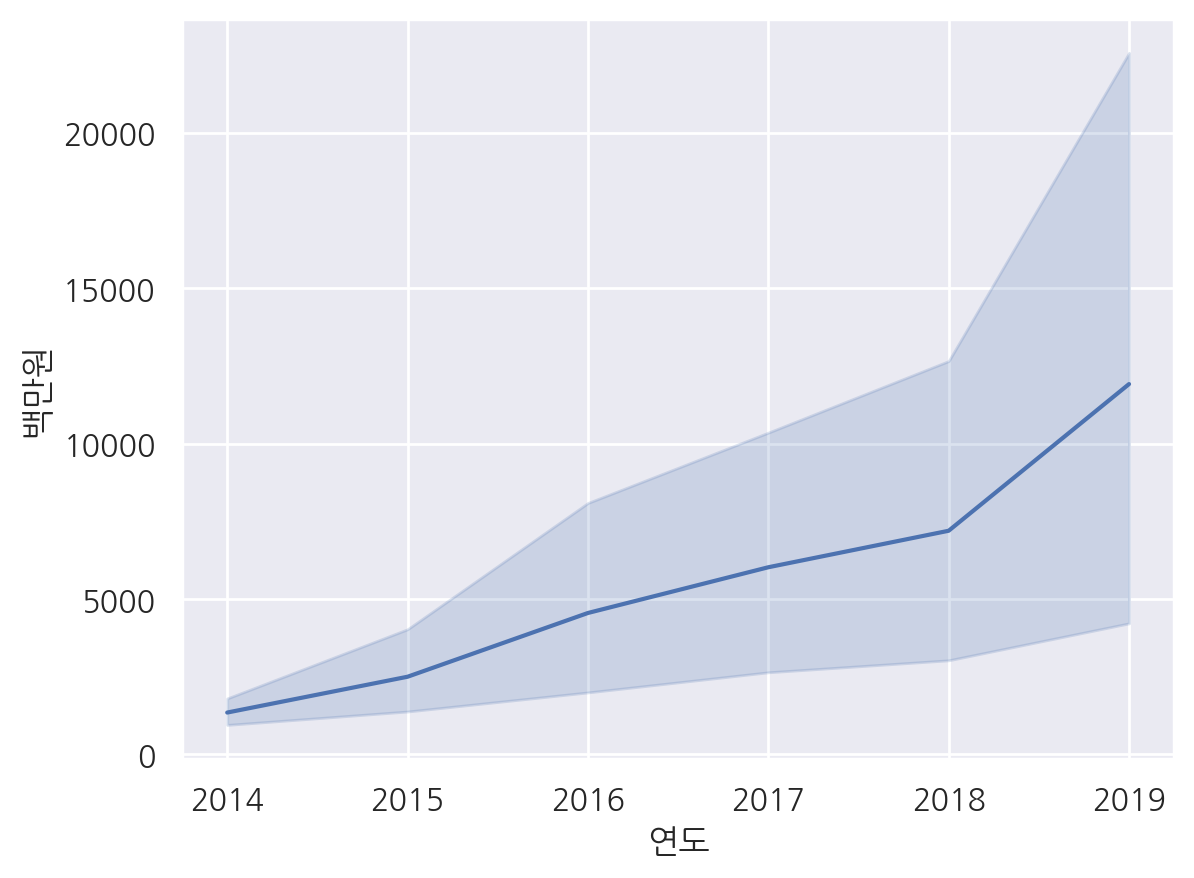

In [ ]:
# 연도, 판매액 lineplot으로 그리기
sns.lineplot(data=df_total, x="연도", y='백만원')

- 상품군별로 다른 색상으로 표시하고, legend 값(범례)을 밖에 표시하는 소스코드 추가하기
    - [legend 참조 링크](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

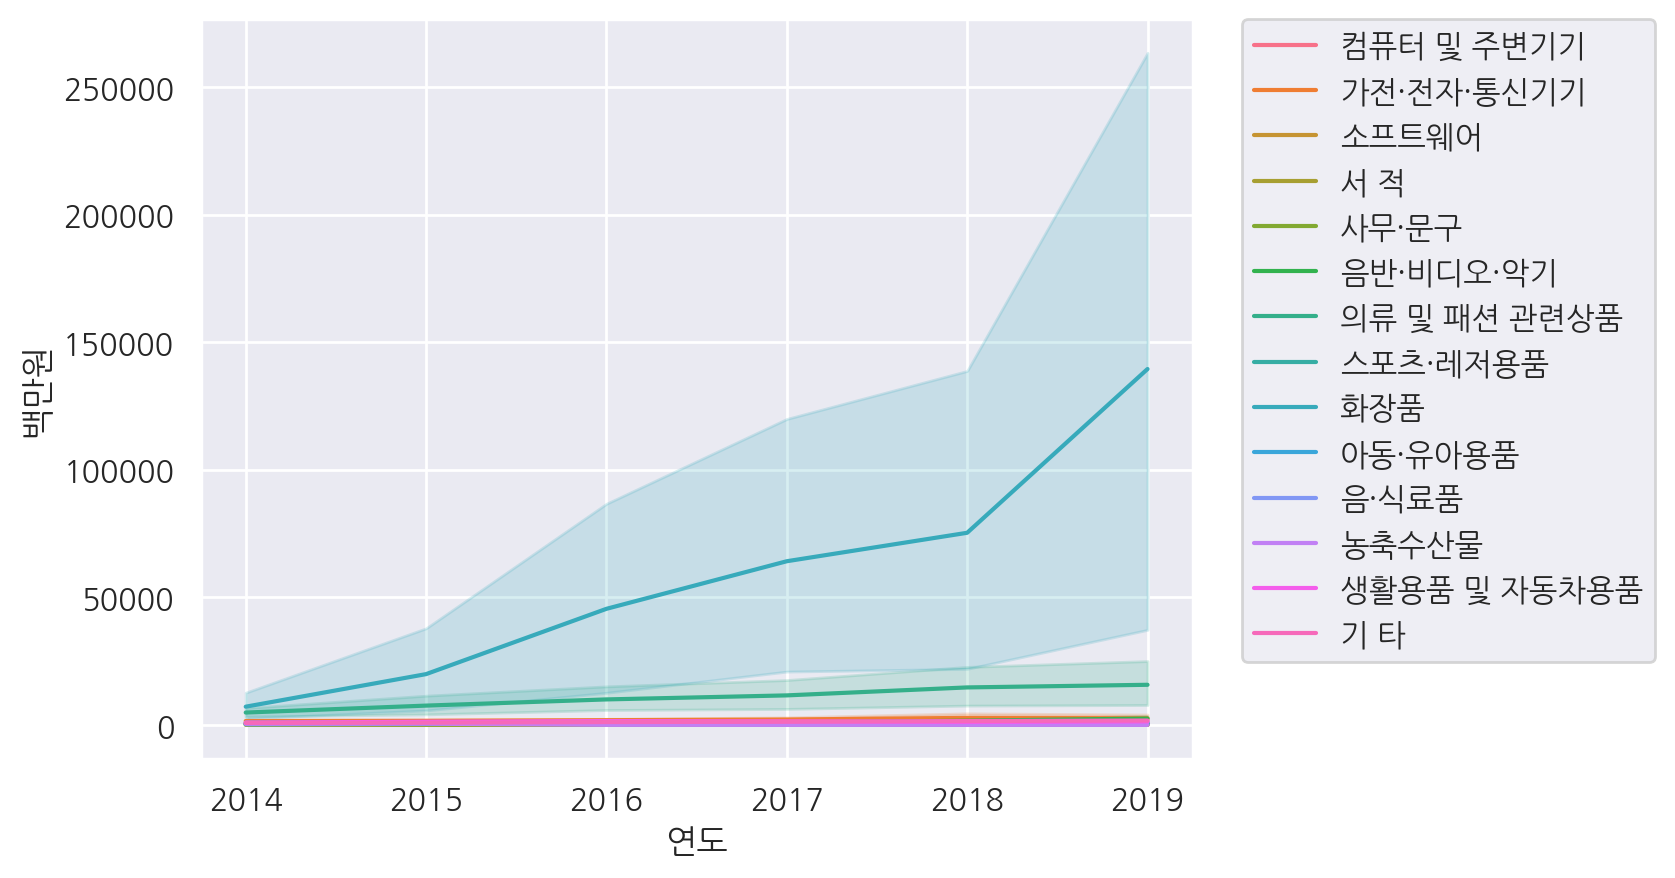

In [ ]:
# 연도, 판매액 lineplot으로 그리고, 상품군별로 다른 색상으로 표시하기
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # 범례를 그래프 우측에 분리하여 배치

-> 화장품의 판매액이 꾸준히 증가함을 확인할 수 있다.

#### relplot
- lineplot의 서브플롯을 그리기 위해 relplot을 사용한다. (상품군별 그래프를 각각 그리기 위해)
- relplot은 기본적으로 산점도(scatter)로 표시하며, kind옵션을 'line'으로 설정하면 선 그래프로 보여준다.
- col 옵션 : 상품군별로 색상을 다르게 표기
- col_wrap 옵션 : 한 행에 표시할 서브플롯 개수

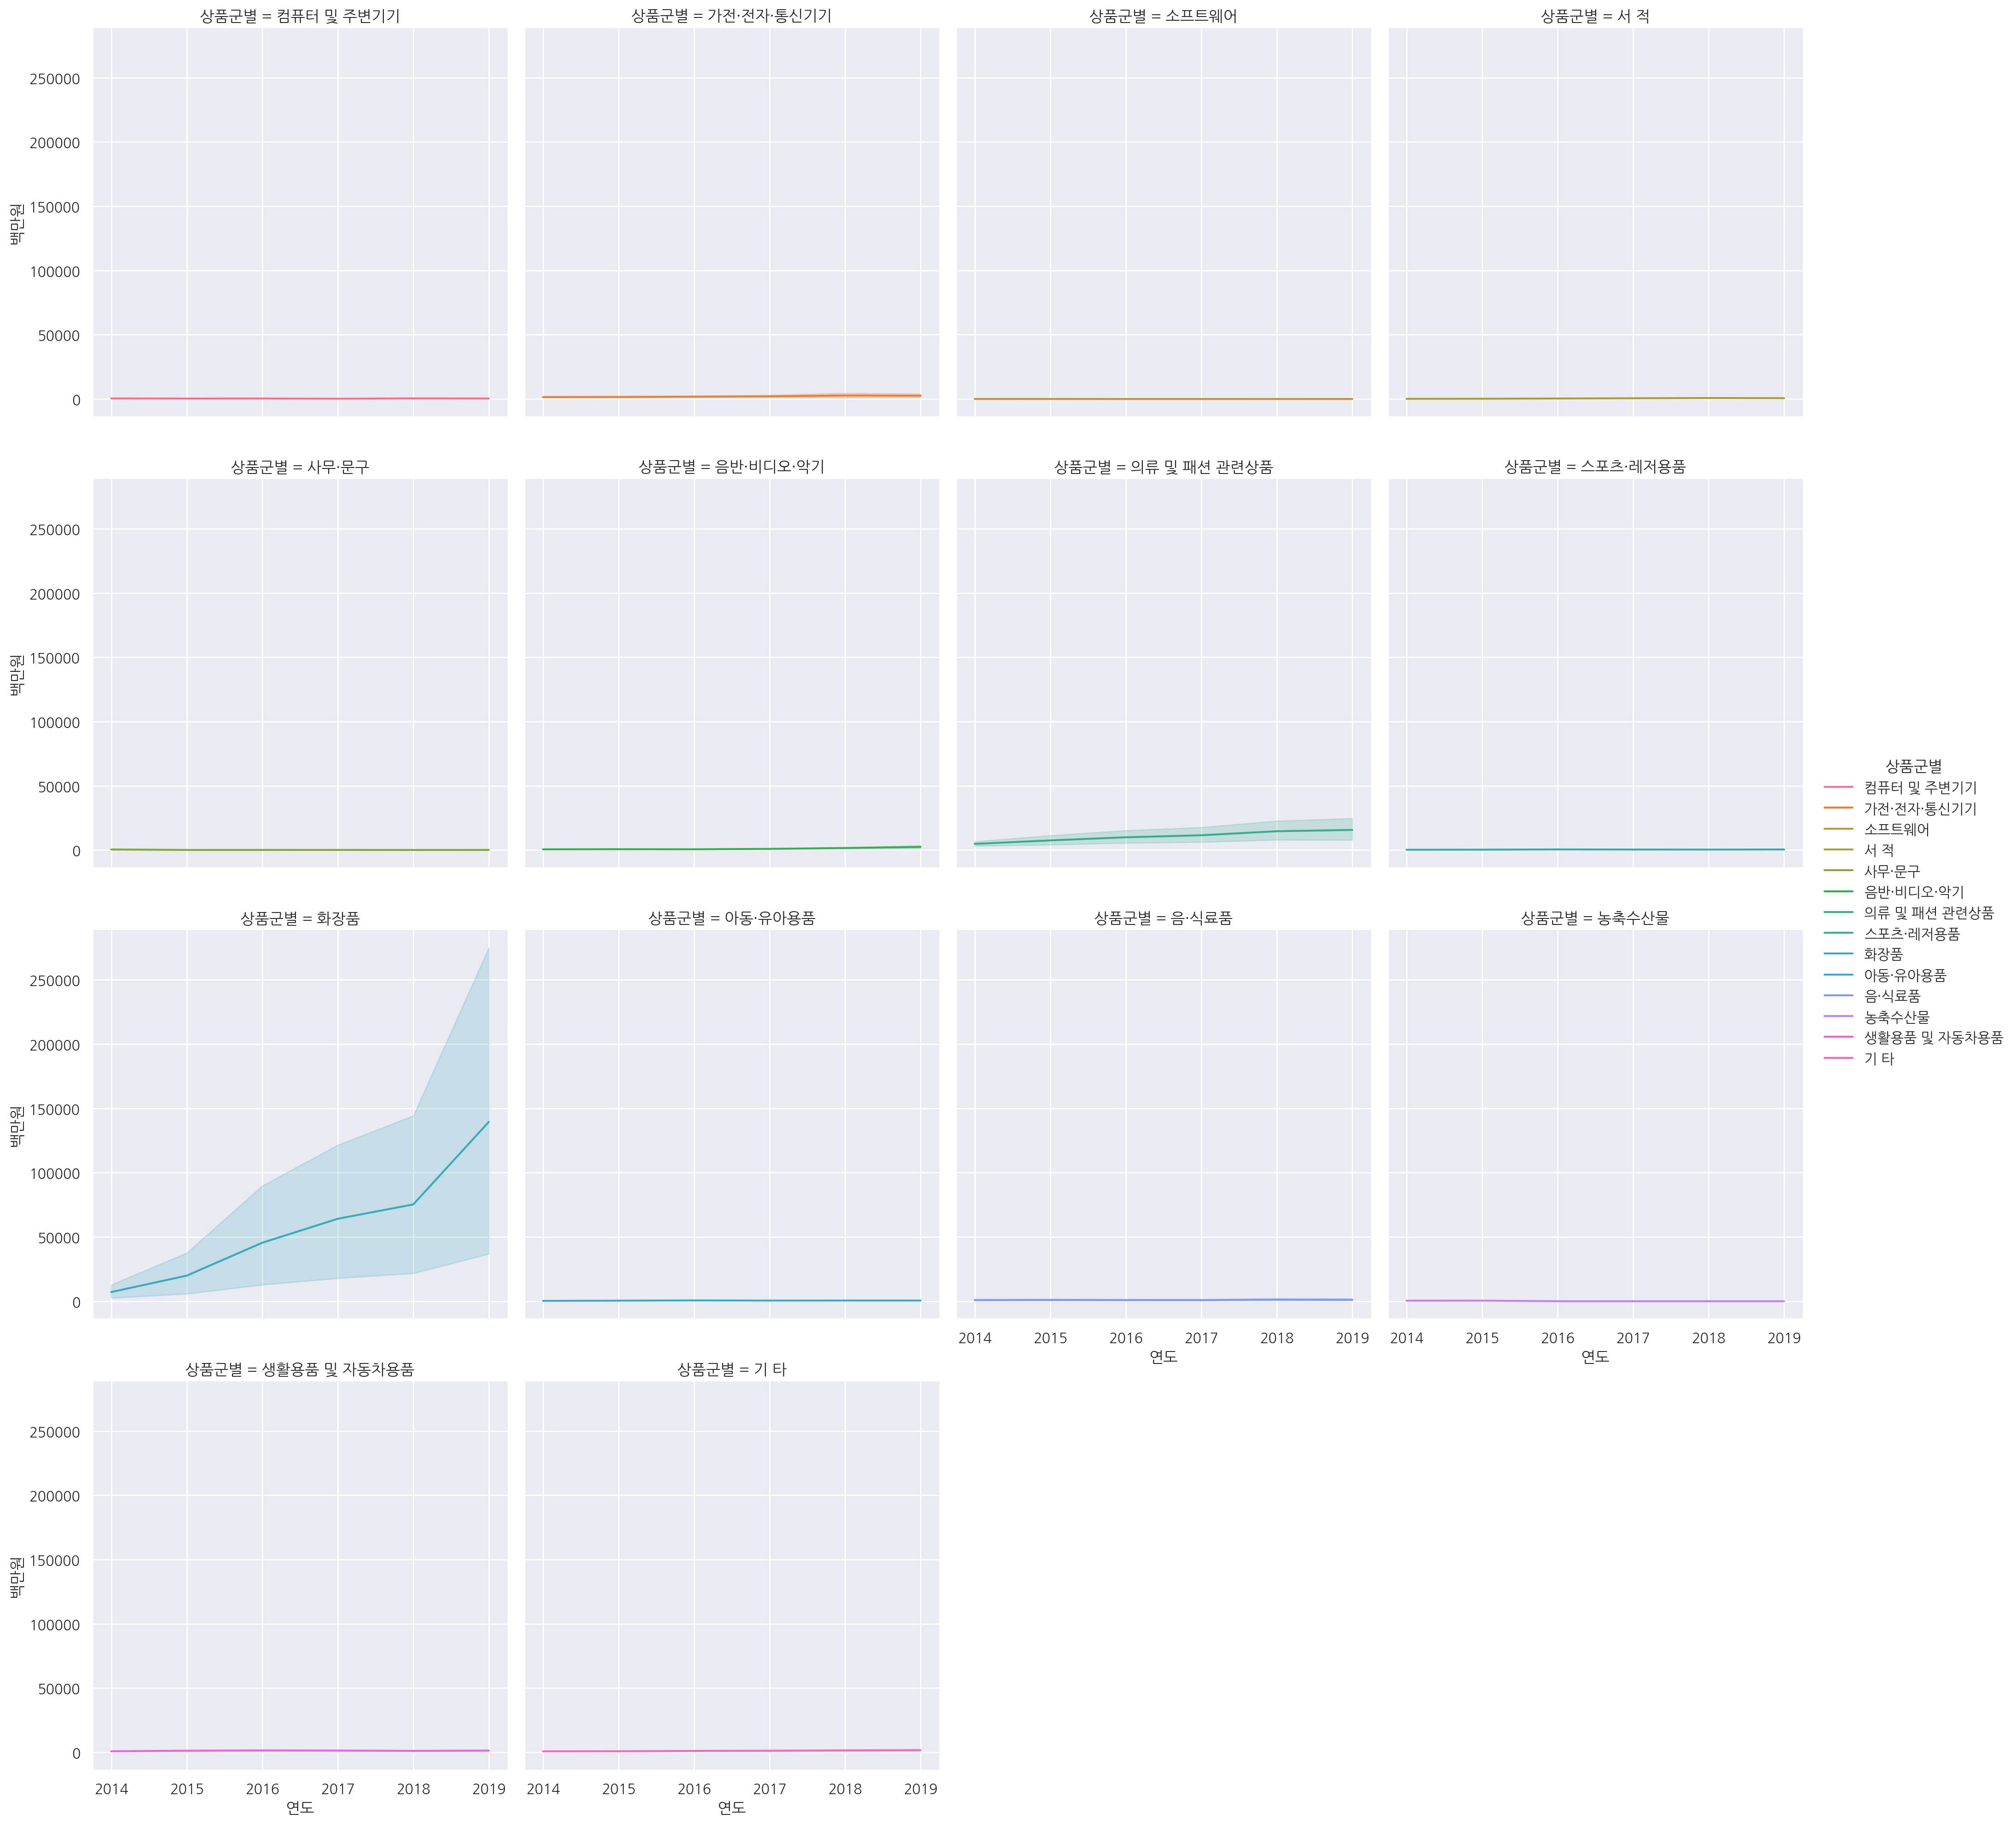

In [ ]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기
# relplot은 기본적으로 산점도로 표시하며, kind옵션을 'line'으로 설정하면 선 그래프로 보여준다.
#
sns.relplot(data=df_total, x='연도', y='백만원',
            hue='상품군별', kind='line', col='상품군별', col_wrap=4)

-> 화장품의 판매액이 크게, 꾸준히 증가함을 알 수 있다.  
-> 화장품 판매액 값의 변화가 커서 상대적으로 다른 상품군의 추이를 알기 어렵다.

- 화장품을 제외한 상품군의 판매액 시각화 하기

In [ ]:
# isin을 사용해 화장품만 제외하고 df_sub 이라는 변수에 담기
df_sub = df_total[~df_total['상품군별'].isin(['화장품'])].copy()
df_sub

국가(대륙)별          상품군별 판매유형별        기간     백만원    연도  분기
48         미국    컴퓨터 및 주변기기     계  2014.1/4  2216.0  2014   1
51         미국    가전·전자·통신기기     계  2014.1/4  2875.0  2014   1
54         미국         소프트웨어     계  2014.1/4    47.0  2014   1
57         미국           서 적     계  2014.1/4   962.0  2014   1
60         미국         사무·문구     계  2014.1/4    25.0  2014   1
...       ...           ...   ...       ...     ...   ...  ..
10785      기타       아동·유아용품     계  2019.4/4   193.0  2019   4
10788      기타         음·식료품     계  2019.4/4   319.0  2019   4
10791      기타         농축수산물     계  2019.4/4     2.0  2019   4
10794      기타  생활용품 및 자동차용품     계  2019.4/4   531.0  2019   4
10797      기타           기 타     계  2019.4/4  1094.0  2019   4

[2808 rows x 7 columns]

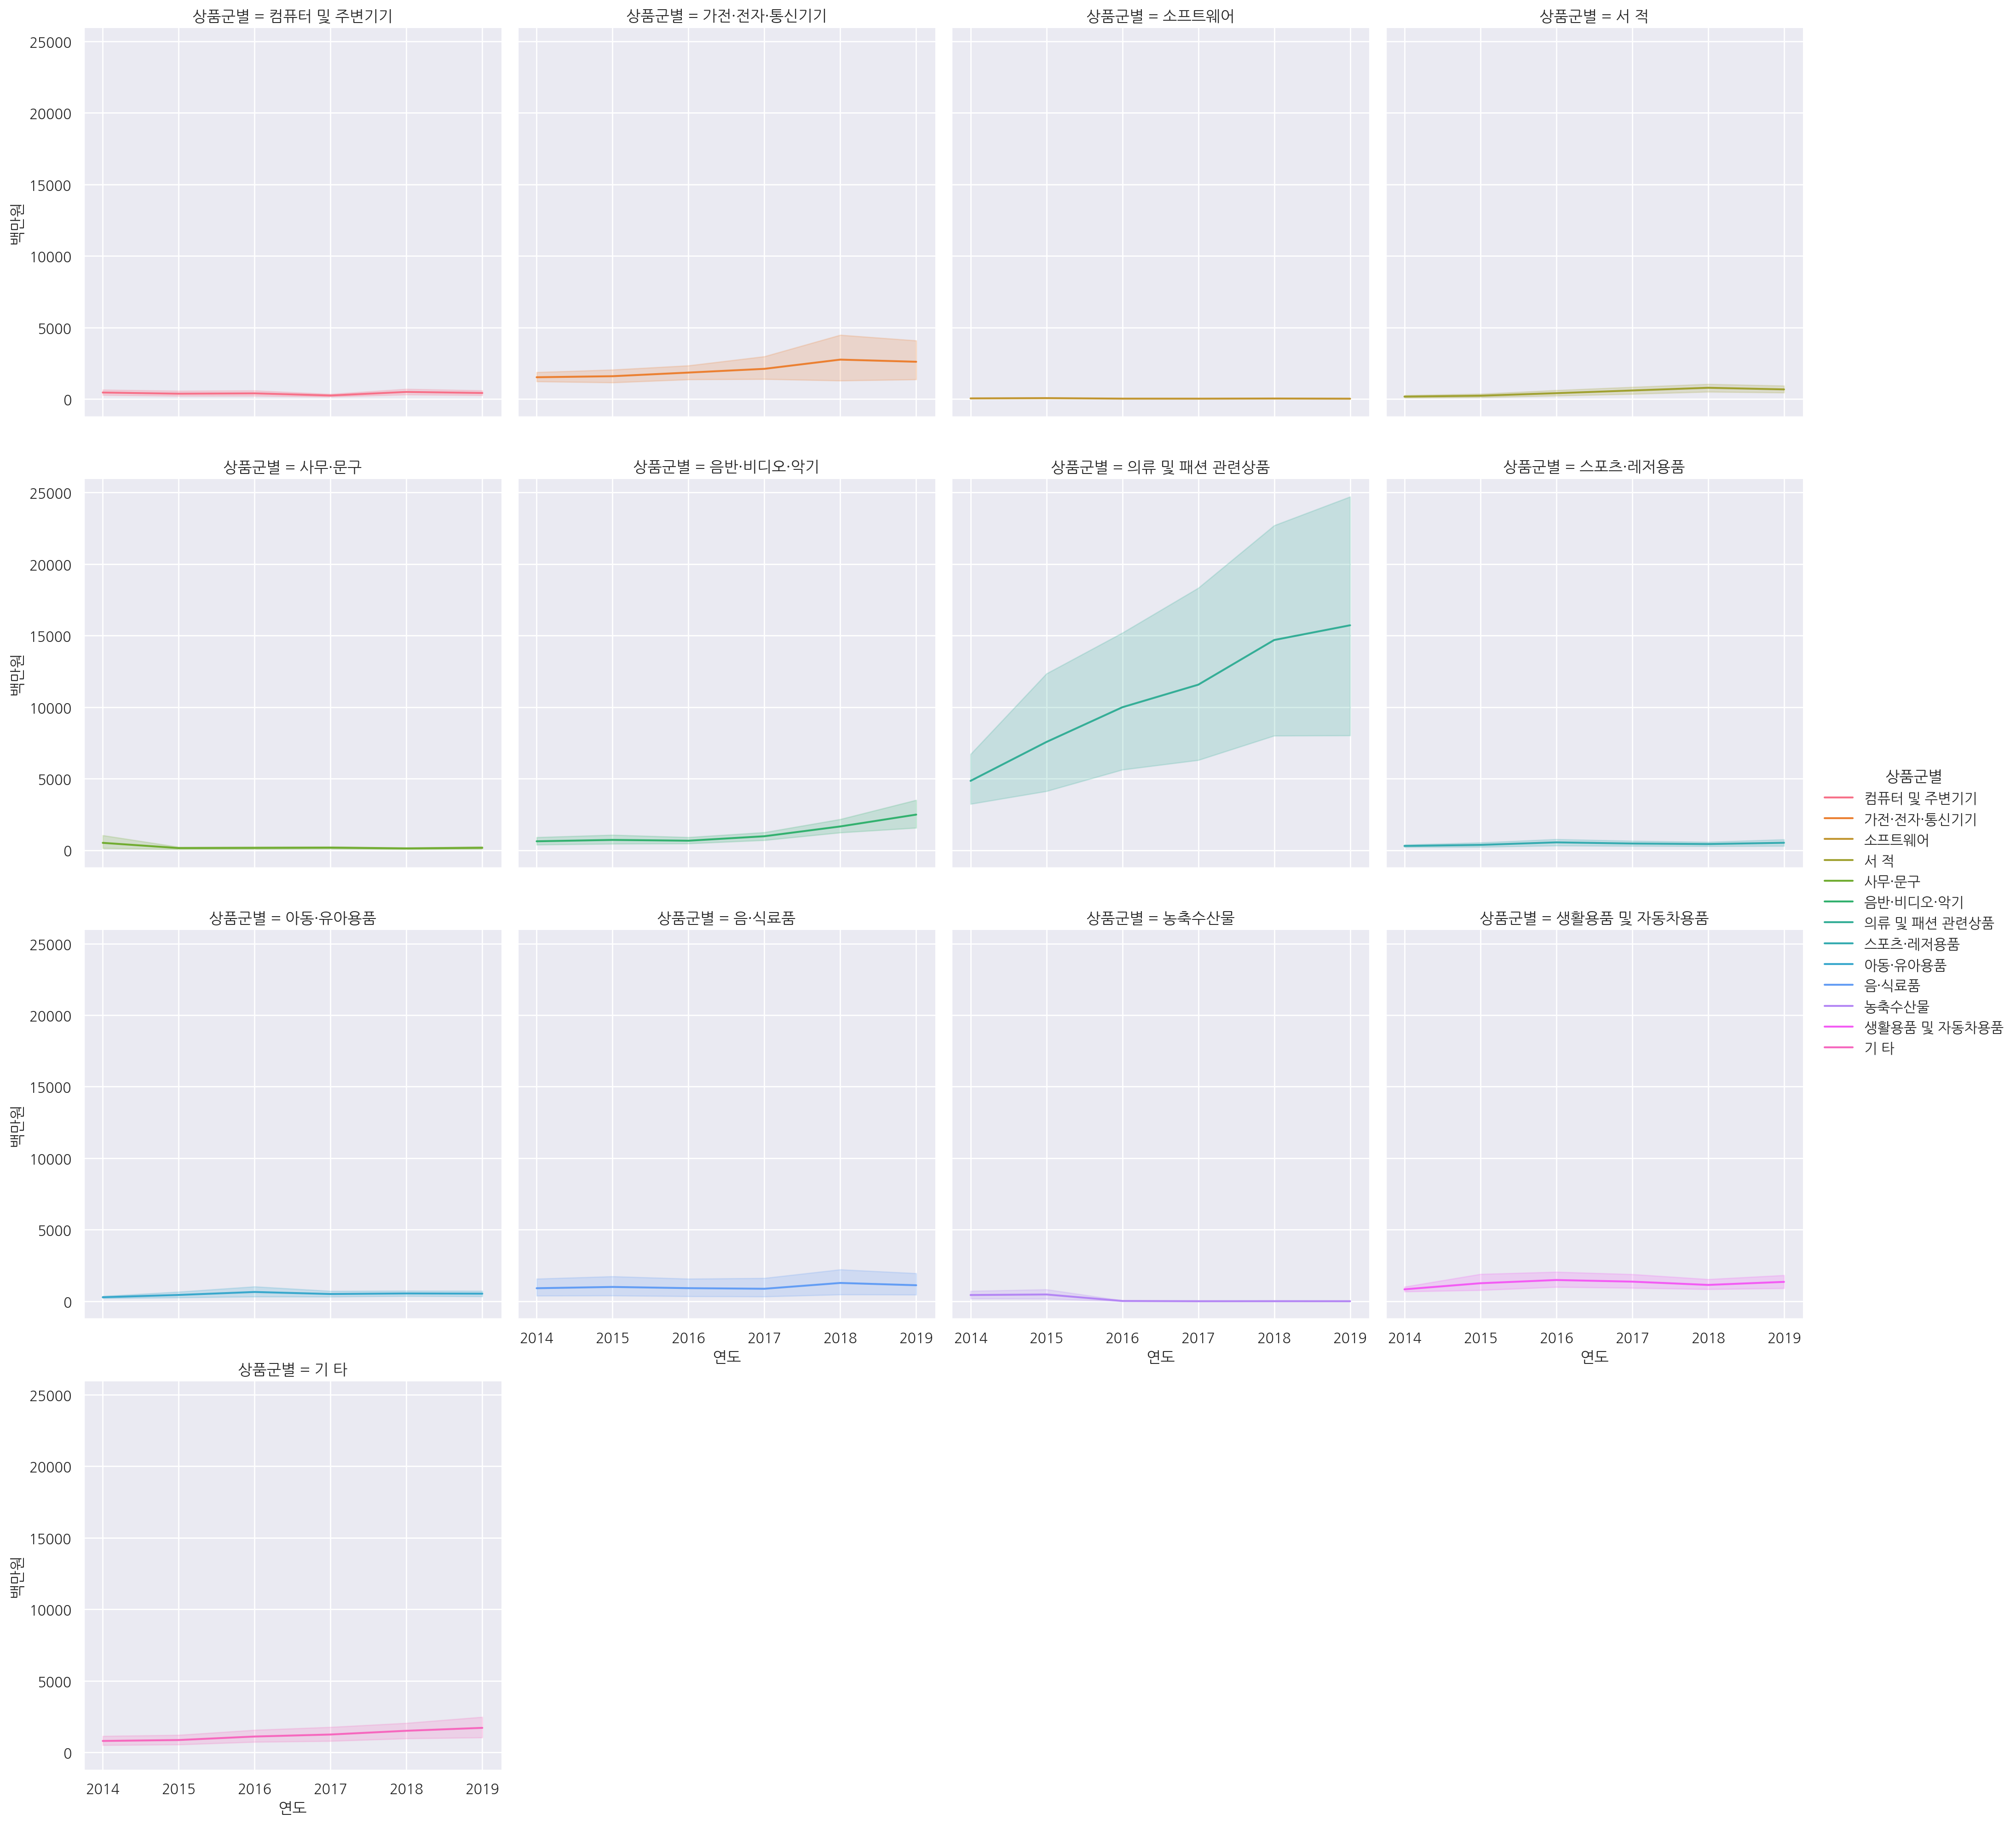

In [ ]:
# 연도별 판매액을 상품군별(화장품 제외)로 replot을 활용해 서프블롯으로 그려보기

sns.relplot(data=df_sub, x='연도', y='백만원',
            hue='상품군별', col='상품군별', col_wrap=4, kind='line')

-> 의류 및 패션 관련 상품의 증가폭이 매우 크다.  
- 나머지 상품군의 변화를 쉽게 파악하기 위해 의류 및 패션 상품도 제외하기

In [21]:
# isin을 사용해 화장품, 의류 및 패션 관련 상품을 제외하고 df_sub 이라는 변수에 담기
df_sub = df_total[~df_total['상품군별'].isin(['화장품', '의류 및 패션 관련상품'])].copy()
df_sub

국가(대륙)별          상품군별 판매유형별        기간     백만원    연도  분기
48         미국    컴퓨터 및 주변기기     계  2014.1/4  2216.0  2014   1
51         미국    가전·전자·통신기기     계  2014.1/4  2875.0  2014   1
54         미국         소프트웨어     계  2014.1/4    47.0  2014   1
57         미국           서 적     계  2014.1/4   962.0  2014   1
60         미국         사무·문구     계  2014.1/4    25.0  2014   1
...       ...           ...   ...       ...     ...   ...  ..
10785      기타       아동·유아용품     계  2019.4/4   193.0  2019   4
10788      기타         음·식료품     계  2019.4/4   319.0  2019   4
10791      기타         농축수산물     계  2019.4/4     2.0  2019   4
10794      기타  생활용품 및 자동차용품     계  2019.4/4   531.0  2019   4
10797      기타           기 타     계  2019.4/4  1094.0  2019   4

[2592 rows x 7 columns]

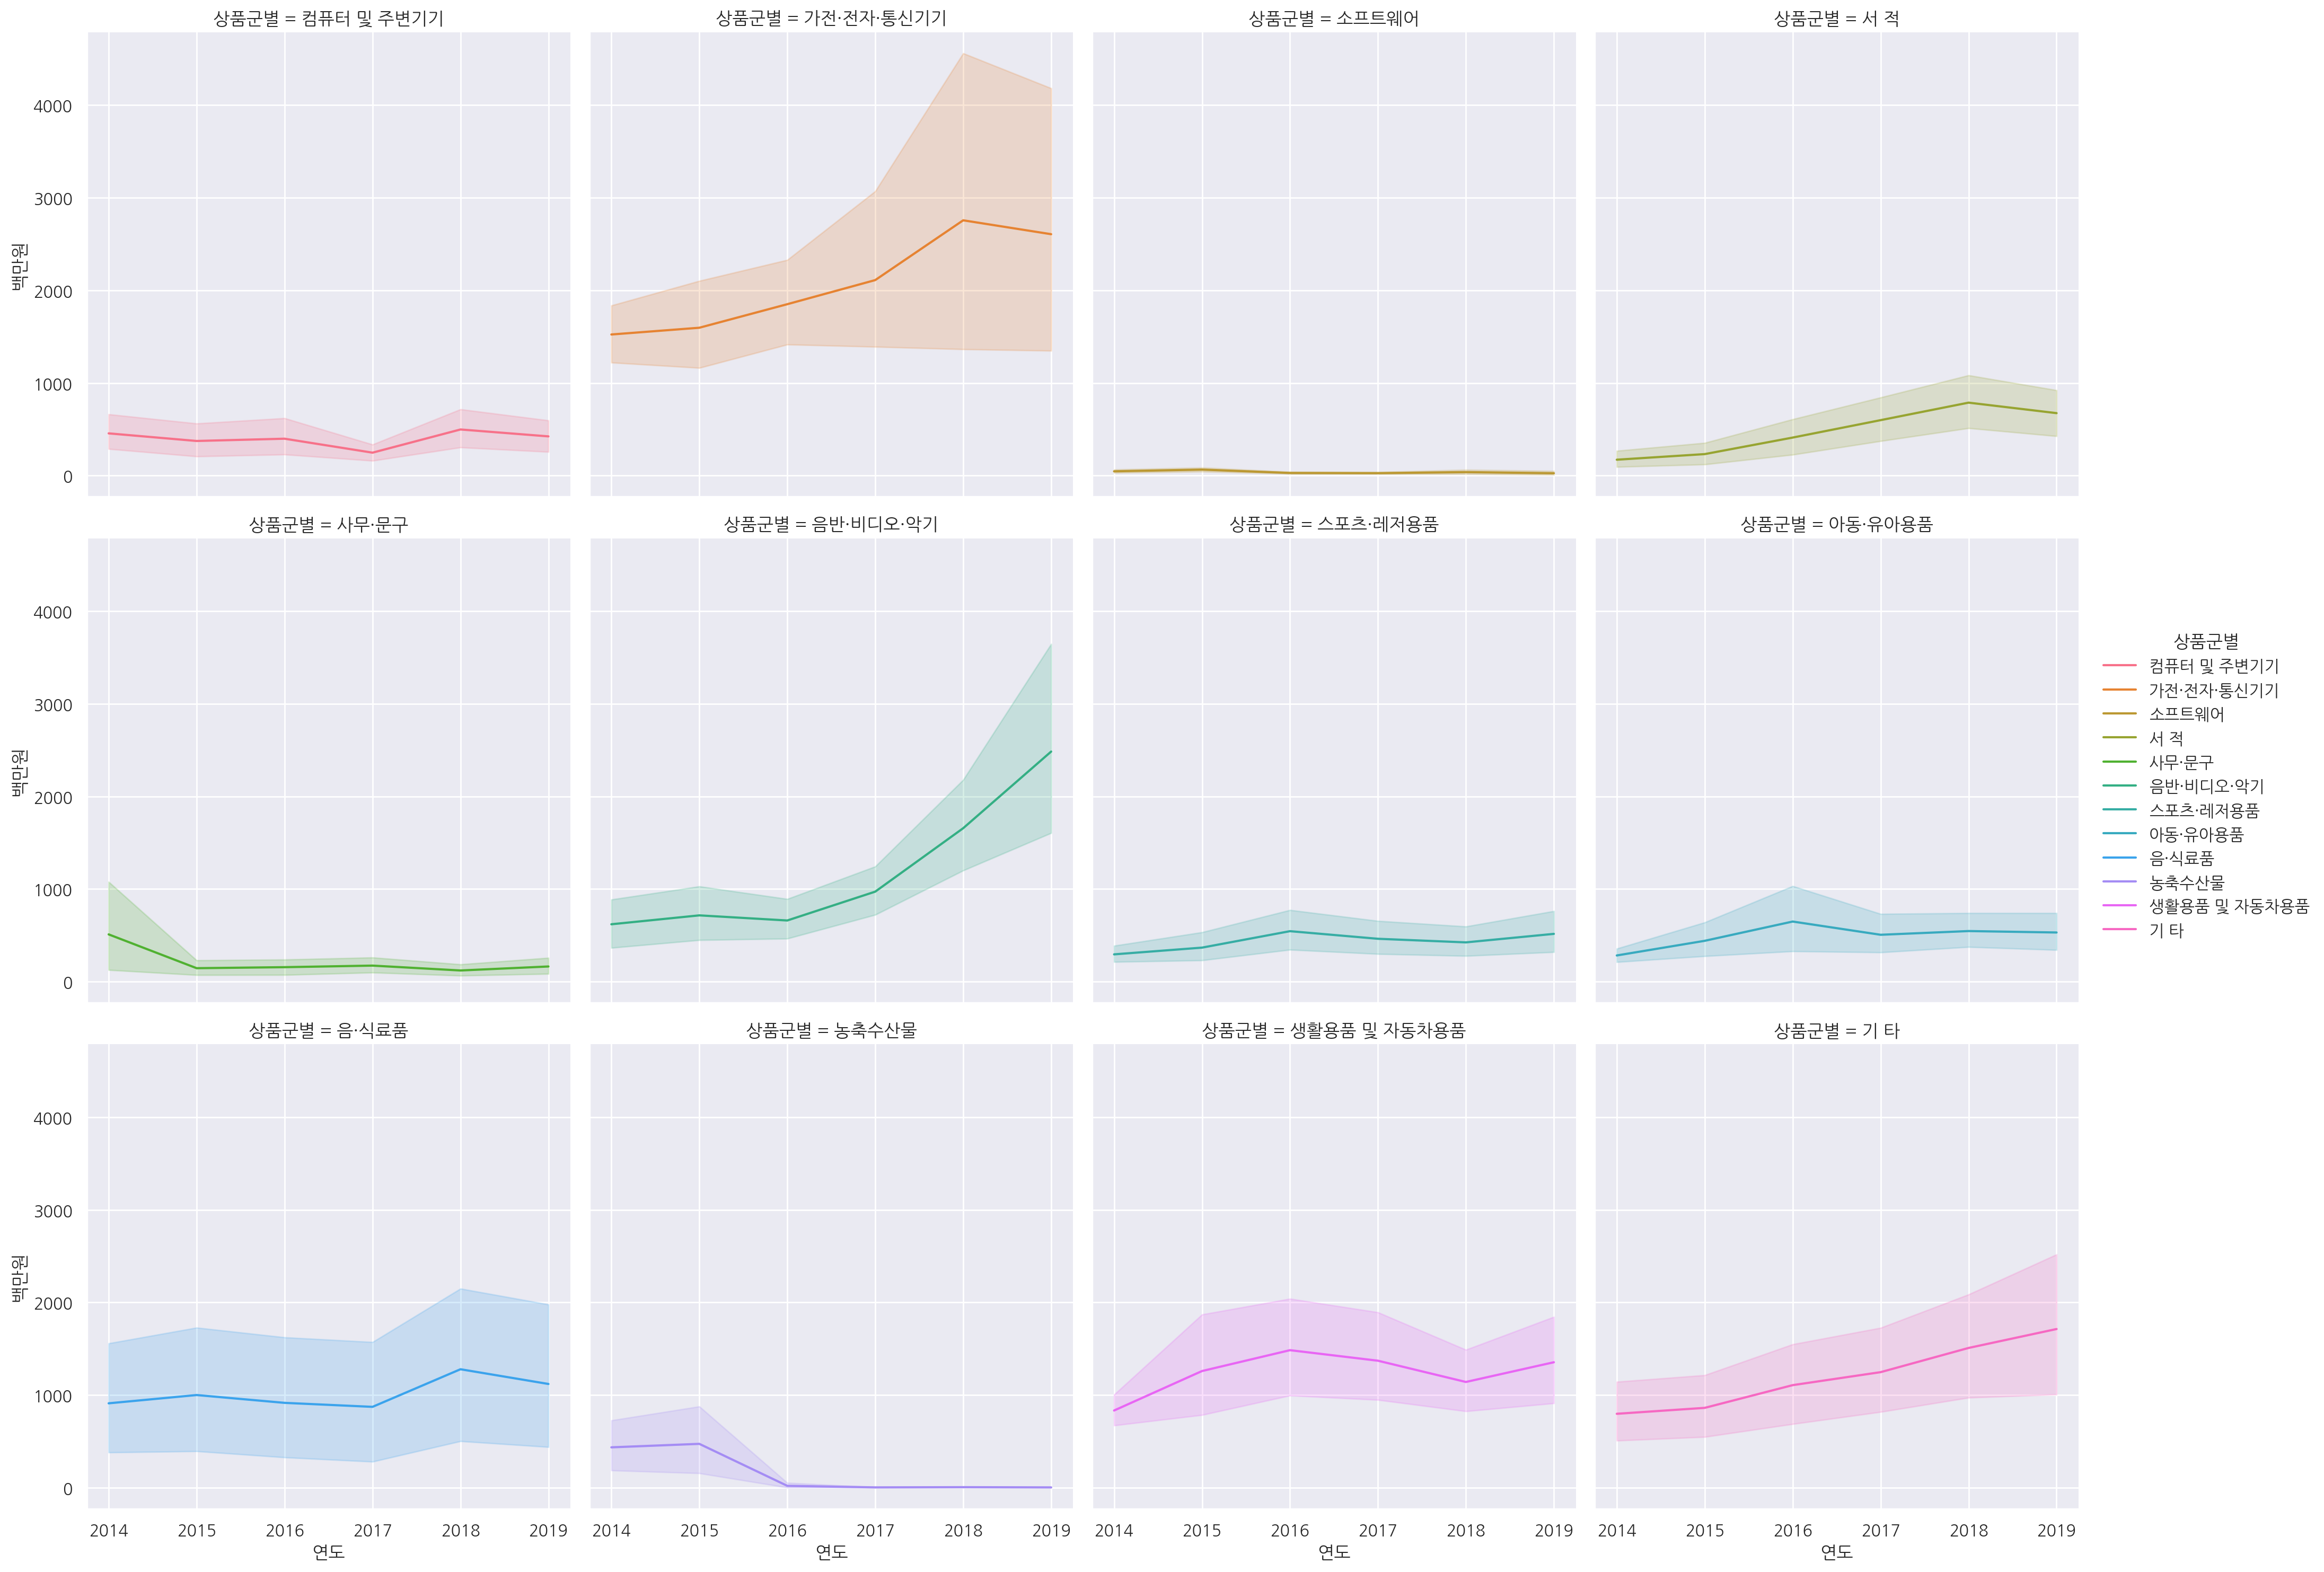

In [ ]:
# 연도별 판매액을 상품군별(화장품, 의류 및 패션 관련상품 제외)로 replot을 활용해 서프블롯으로 그려보기
sns.relplot(data=df_sub, x='연도', y='백만원',
            hue='상품군별', col='상품군별', col_wrap=4, kind='line')

-> 가전/전자/통신기기와 음반/비디오/악기 상품군이 크게 증가하였으며, 서적도 증가하긴 했으나 마지막에 주춤하였다.

### 화장품의 온라인쇼핑 해외직접판매액

In [22]:
# df_cosmetic 이라는 변수에 상품군별이 화장품인 데이터만 가져오기
df_cosmetic = df_total[df_total['상품군별'] == '화장품'].copy()
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

<Axes: xlabel='연도', ylabel='백만원'>

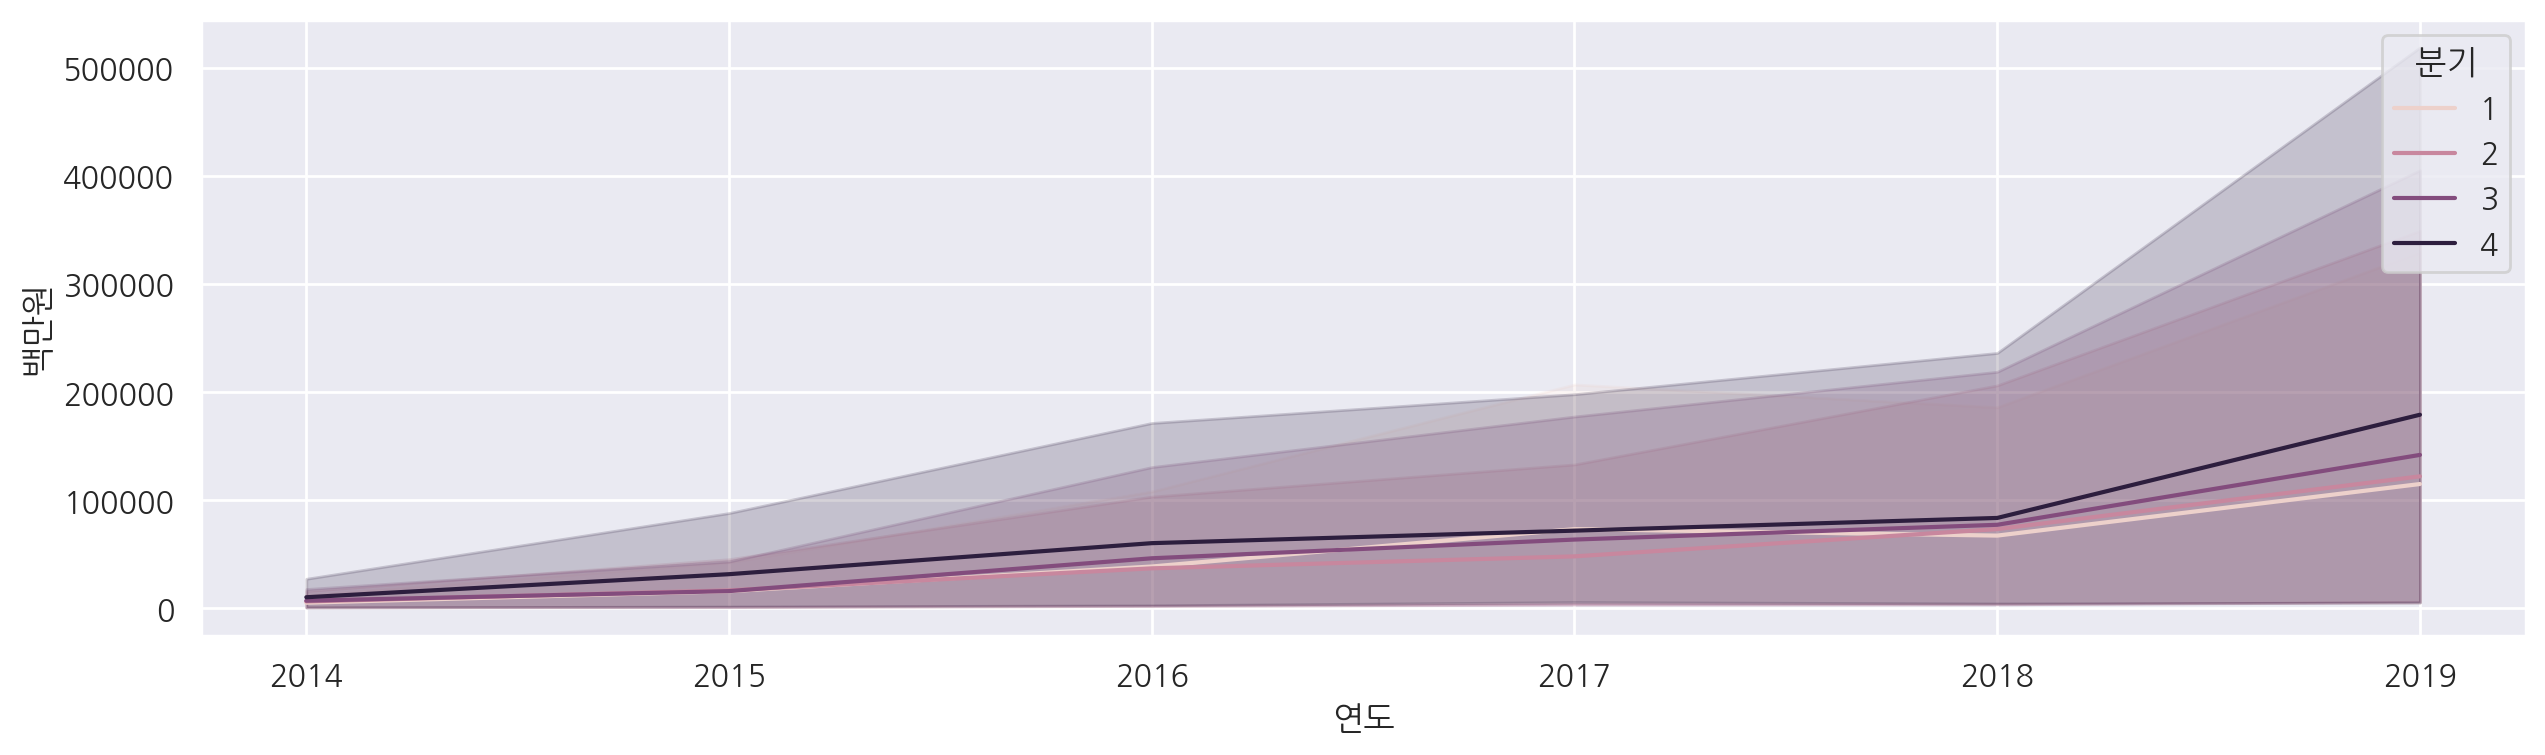

In [ ]:
# 연도와 판매액을 lineplot으로 그리고, 분기별로 다른 색상으로 표현해보기

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x='연도', y='백만원', hue='분기')

-> 1분기보다 4분기의 판매액이 가장 크게 증가하고 있다. 1분기에 이어 4분기까지 계속 성장하고 있기 때문이다. (누적량 반영)

<Axes: xlabel='기간', ylabel='백만원'>

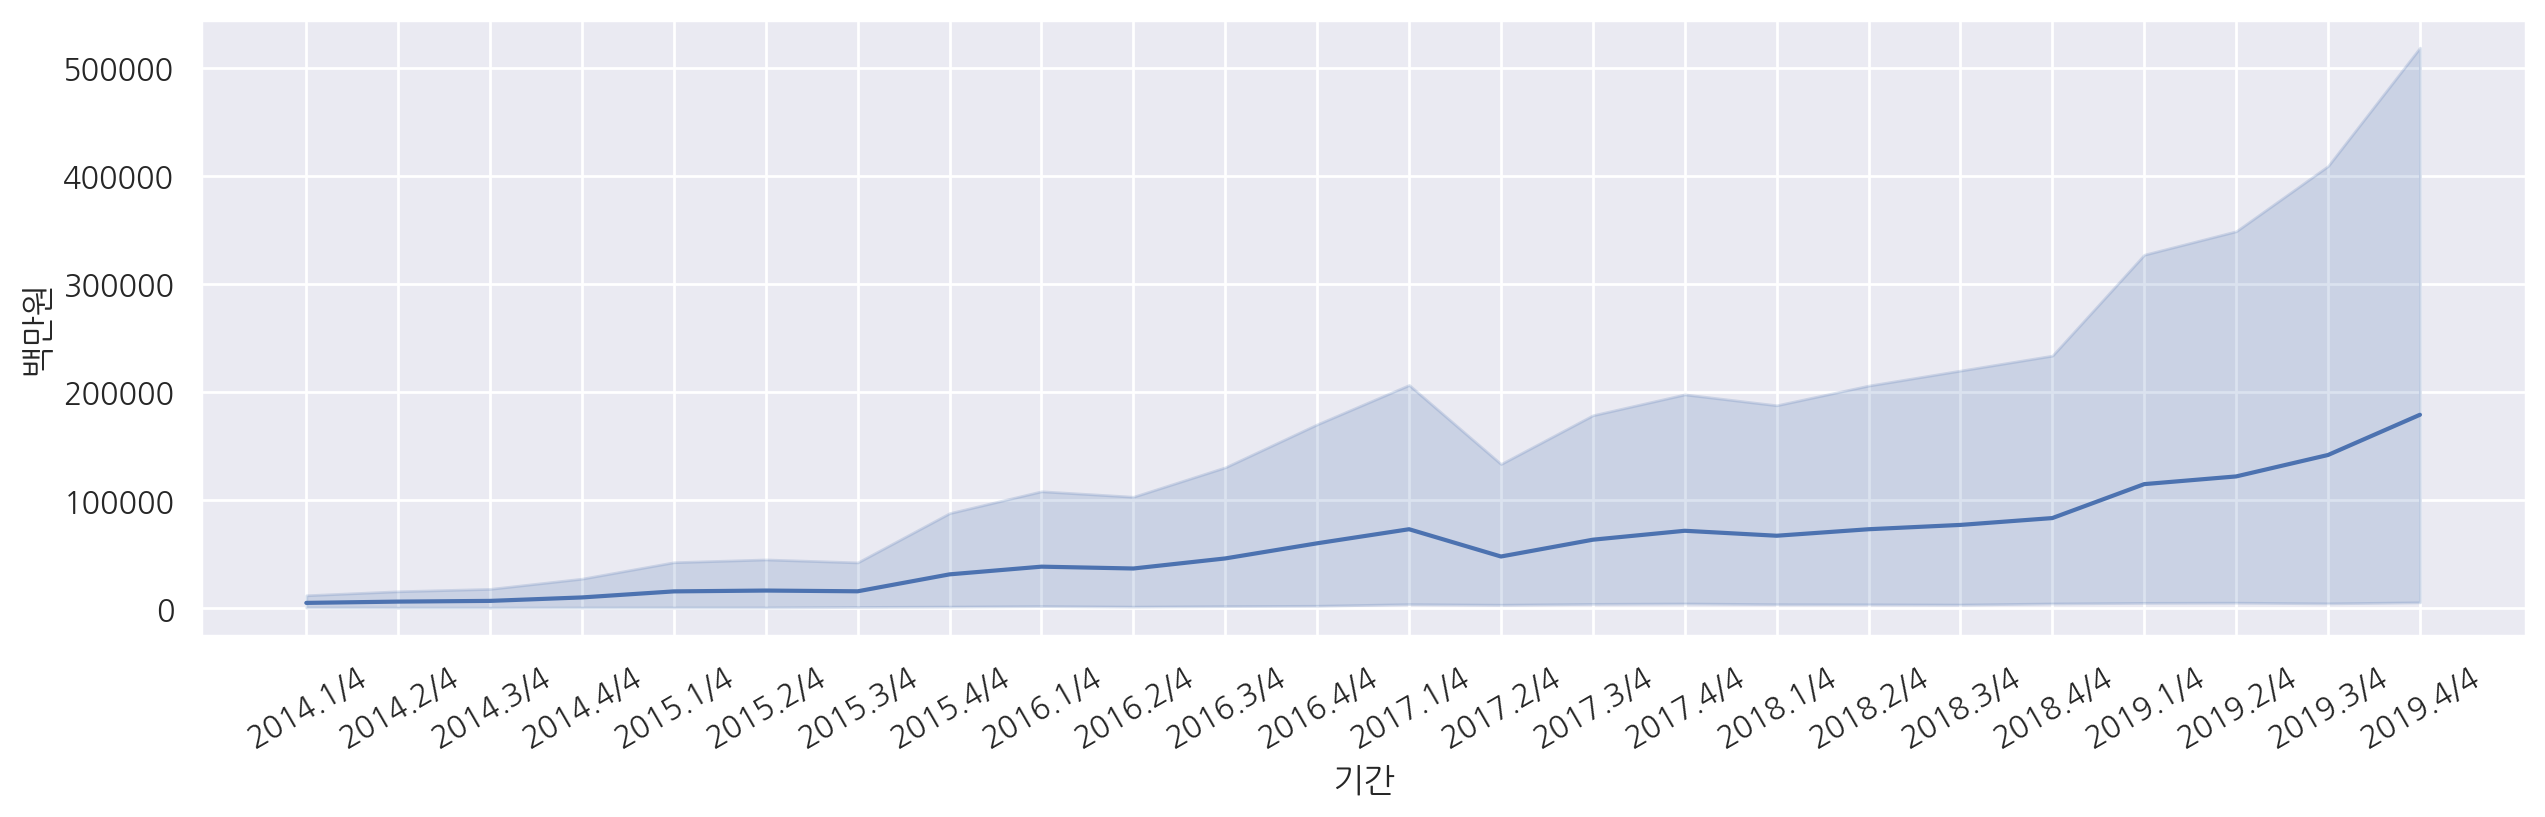

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화 하기

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)  # x축 글씨 기울여 써서 가시성 향상시키기
sns.lineplot(data=df_cosmetic, x='기간', y='백만원')

In [ ]:
df_cosmetic.head()

국가(대륙)별 상품군별 판매유형별        기간      백만원    연도  분기
72           미국  화장품     계  2014.1/4   3740.0  2014   1
117          중국  화장품     계  2014.1/4  32235.0  2014   1
162          일본  화장품     계  2014.1/4   1034.0  2014   1
207  아세안(ASEAN)  화장품     계  2014.1/4    398.0  2014   1
252    유럽연합(EU)  화장품     계  2014.1/4    937.0  2014   1

<Axes: xlabel='기간', ylabel='백만원'>

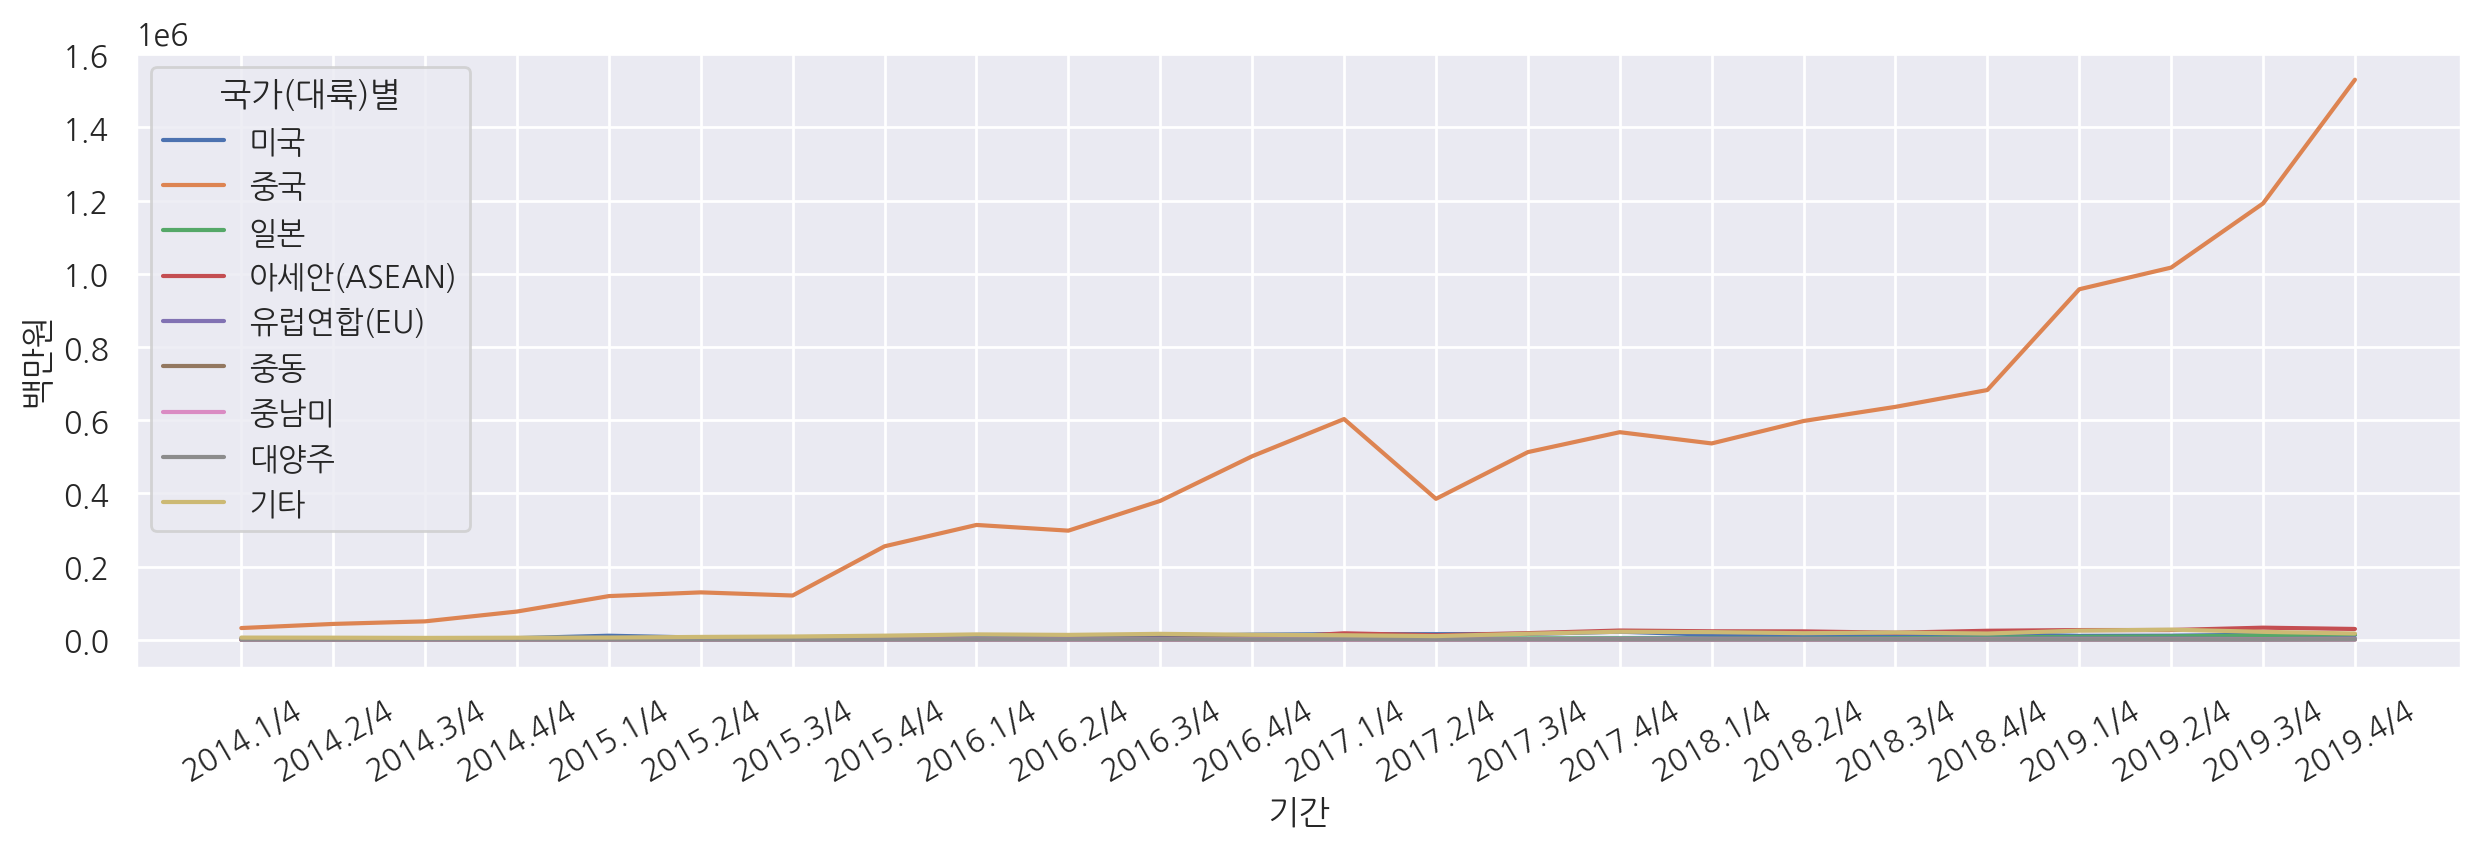

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고, '국가(대륙)별'로 다른 색상으로 표시하기

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='백만원', hue='국가(대륙)별')

-> 주황색(중국)의 판매액이 가장 높다.  
- 중국을 제외한, 다른 국가들의 판매액 보기

<Axes: xlabel='기간', ylabel='백만원'>

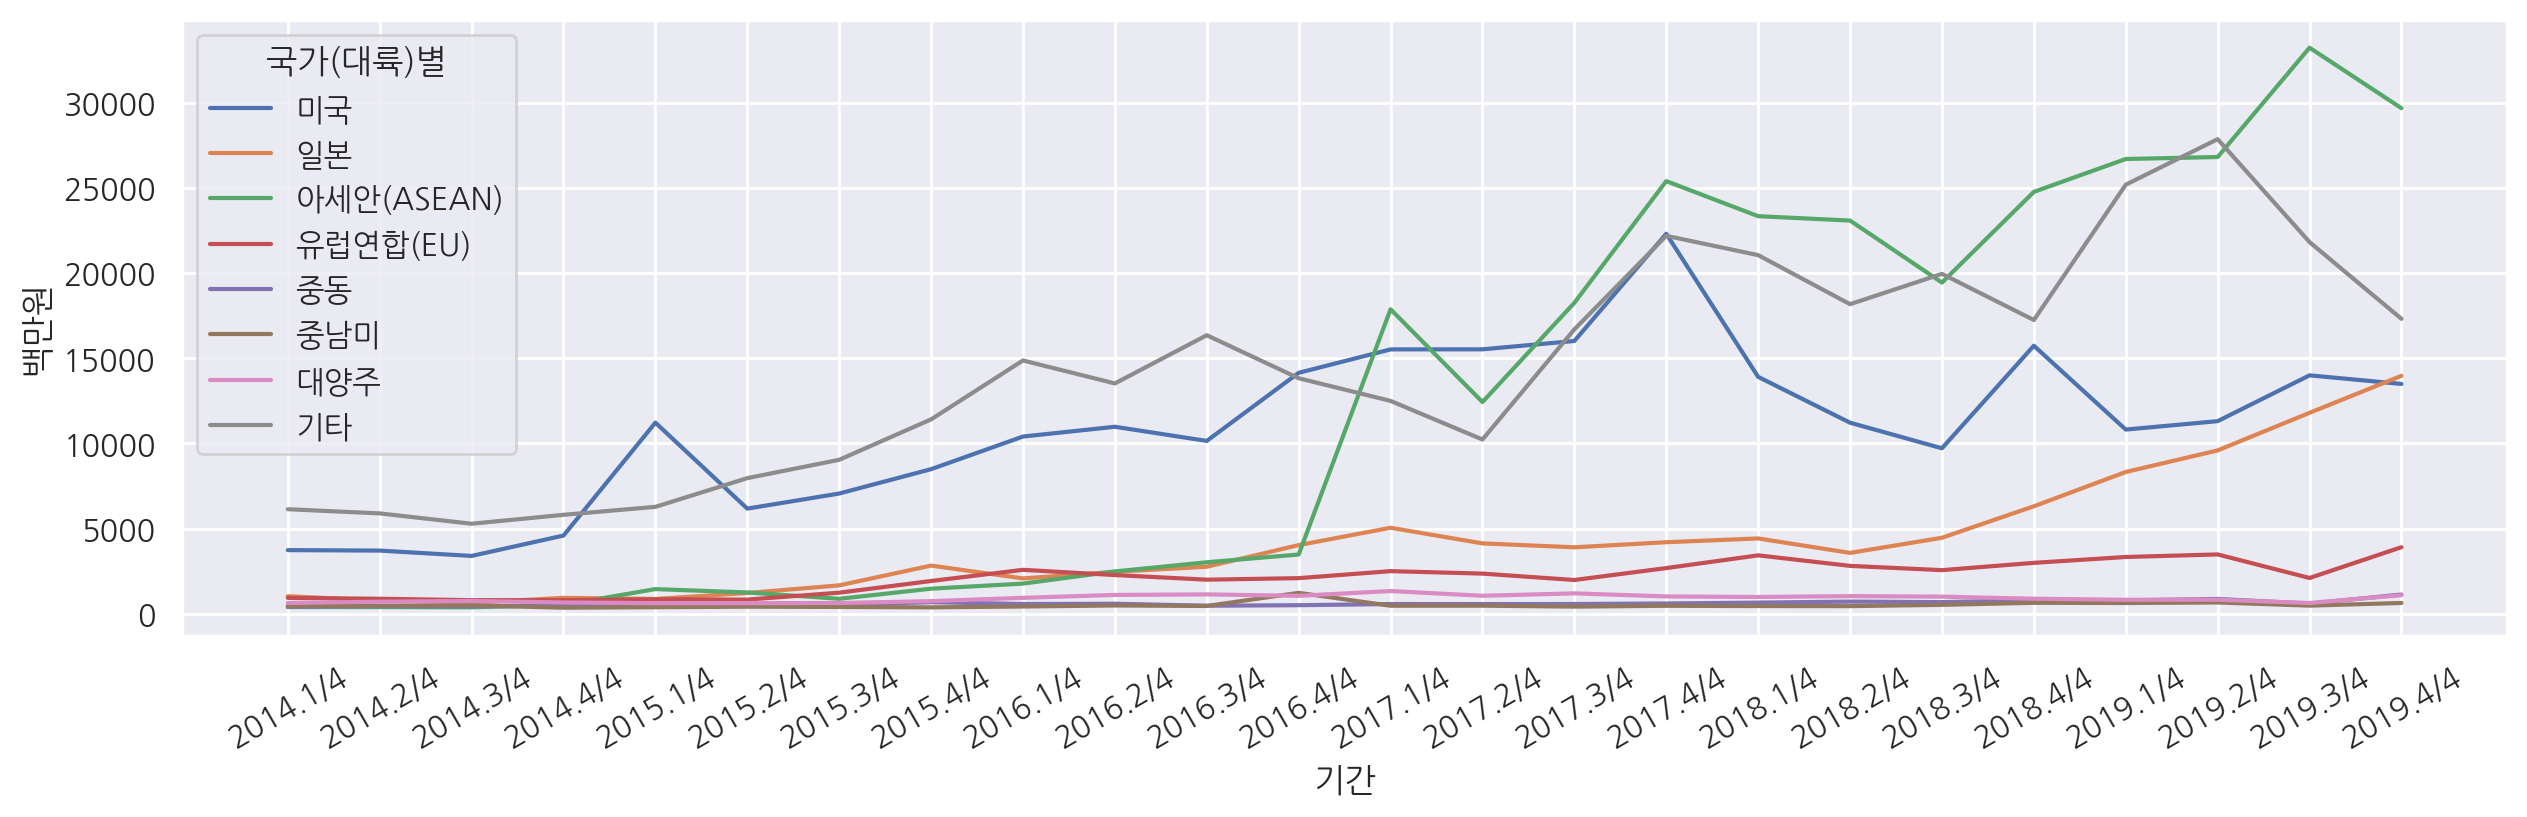

In [ ]:
# 중국을 제외한 국가들의 판매액 보기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic['국가(대륙)별'] != '중국'],
             x='기간', y='백만원', hue='국가(대륙)별')

-> 아세안 지역에서 급성장하고 있으며, 기타 지역에서도 꾸준히 크게 증가하고 있다.  
-> 미국은 증가 추세였으나 2018년도를 기점으로 하락 후 비슷한 수준을 유지하고 있다.  
-> 일본은 꾸준히 증가하고 있다.


- 화장품 판매액에 대한 기간별 금액 데이터 시각화하고, '판매유형별'로 다른 색상으로 표시하기

In [ ]:
# '판매유형별' 컬럼 확인하기
df['판매유형별']

48            계
49          면세점
50       면세점 이외
51            계
52          면세점
          ...  
10795       면세점
10796    면세점 이외
10797         계
10798       면세점
10799    면세점 이외
Name: 판매유형별, Length: 9072, dtype: object

-> 합계인 '계'를 제외한 데이터만 카피하여 변수에 담기

In [23]:
# '판매유형별'이 '계'가 아닌 것만 변수에 담기
df_salestype = df[df['판매유형별'] != '계'].copy()
df_salestype

국가(대륙)별          상품군별   판매유형별        기간     백만원    연도  분기
49         미국    컴퓨터 및 주변기기     면세점  2014.1/4     NaN  2014   1
50         미국    컴퓨터 및 주변기기  면세점 이외  2014.1/4     NaN  2014   1
52         미국    가전·전자·통신기기     면세점  2014.1/4     NaN  2014   1
53         미국    가전·전자·통신기기  면세점 이외  2014.1/4     NaN  2014   1
55         미국         소프트웨어     면세점  2014.1/4     NaN  2014   1
...       ...           ...     ...       ...     ...   ...  ..
10793      기타         농축수산물  면세점 이외  2019.4/4     2.0  2019   4
10795      기타  생활용품 및 자동차용품     면세점  2019.4/4     0.0  2019   4
10796      기타  생활용품 및 자동차용품  면세점 이외  2019.4/4   531.0  2019   4
10798      기타           기 타     면세점  2019.4/4     1.0  2019   4
10799      기타           기 타  면세점 이외  2019.4/4  1093.0  2019   4

[6048 rows x 7 columns]

<Axes: xlabel='기간', ylabel='백만원'>

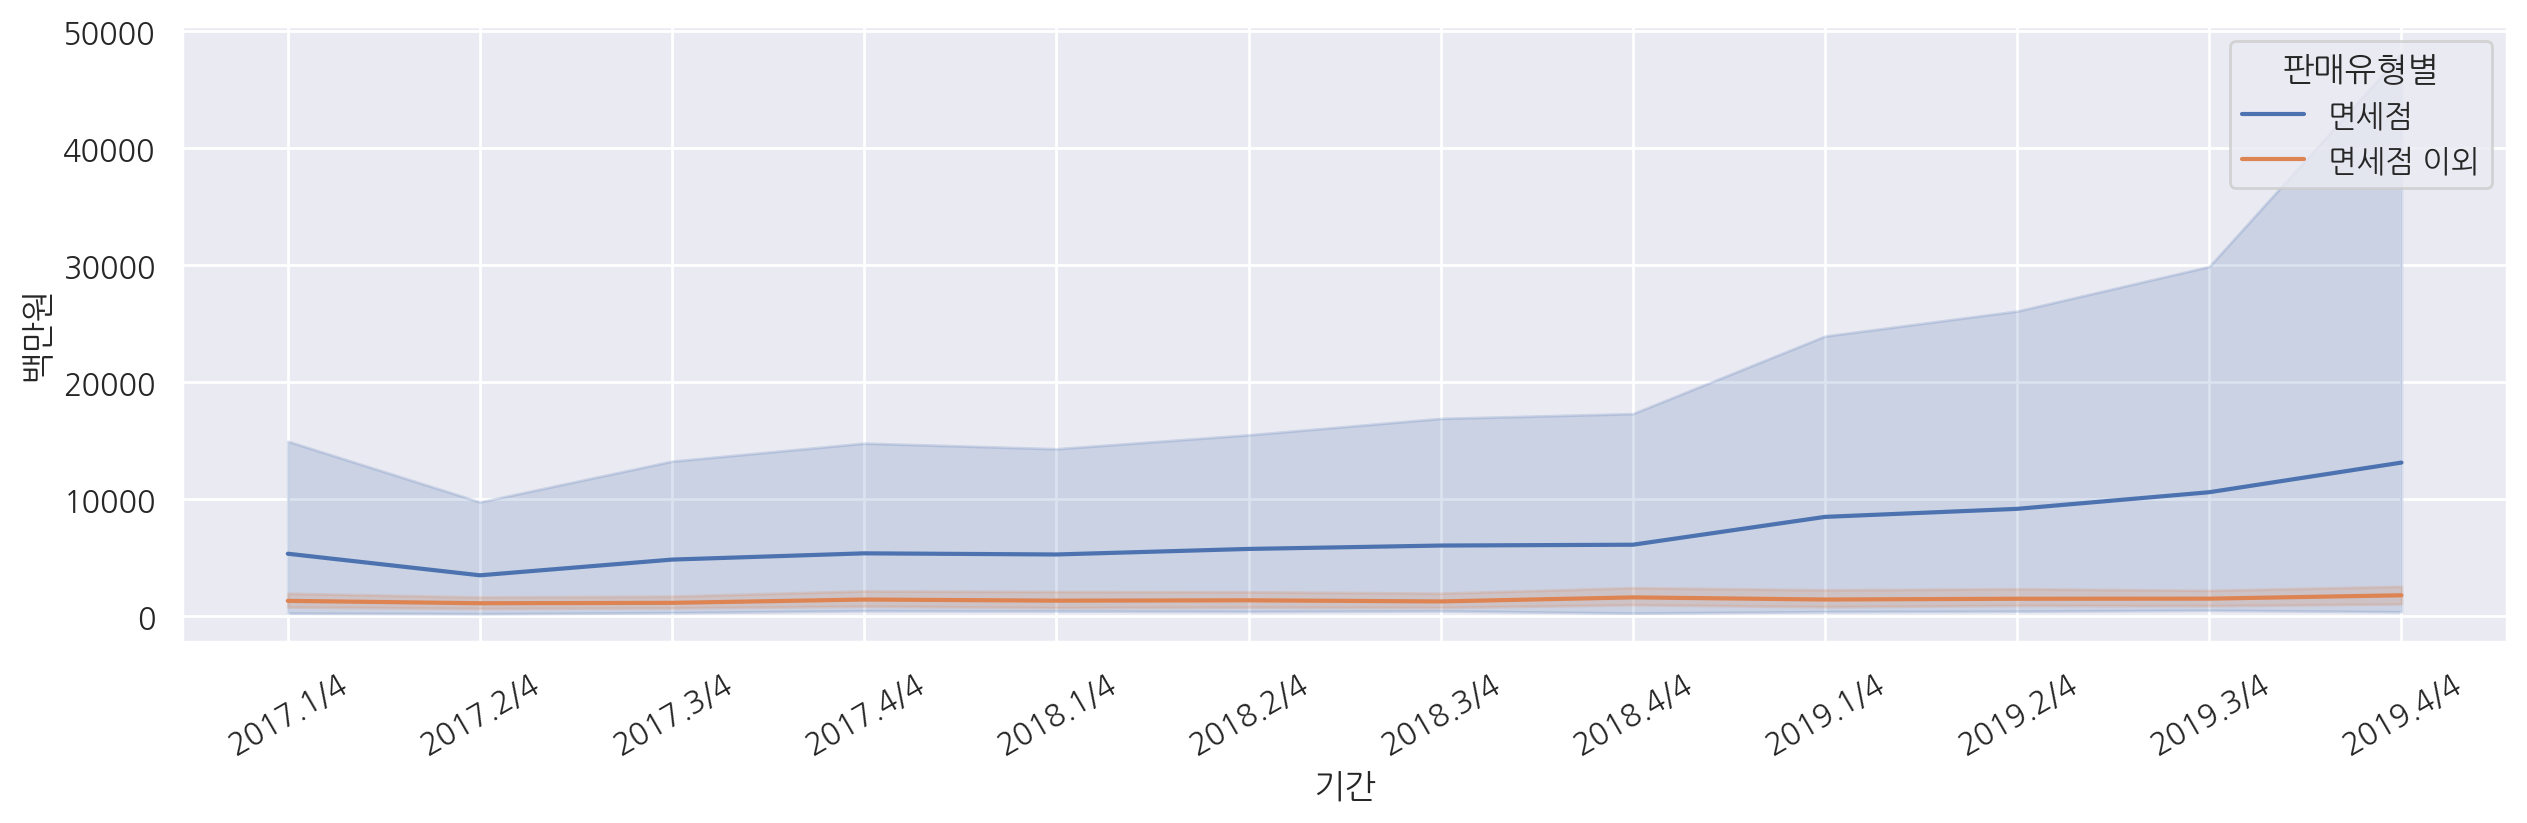

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고, '판매유형별'로 다른 색상으로 표시하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_salestype, x='기간', y='백만원', hue='판매유형별')

-> 여기서 '면세점'은 온라인 면세점을 의미함.

<ipython-input-24-e879af970de6>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_no_duty, x='기간', y='백만원', hue='판매유형별', ci=None)


<Axes: xlabel='기간', ylabel='백만원'>

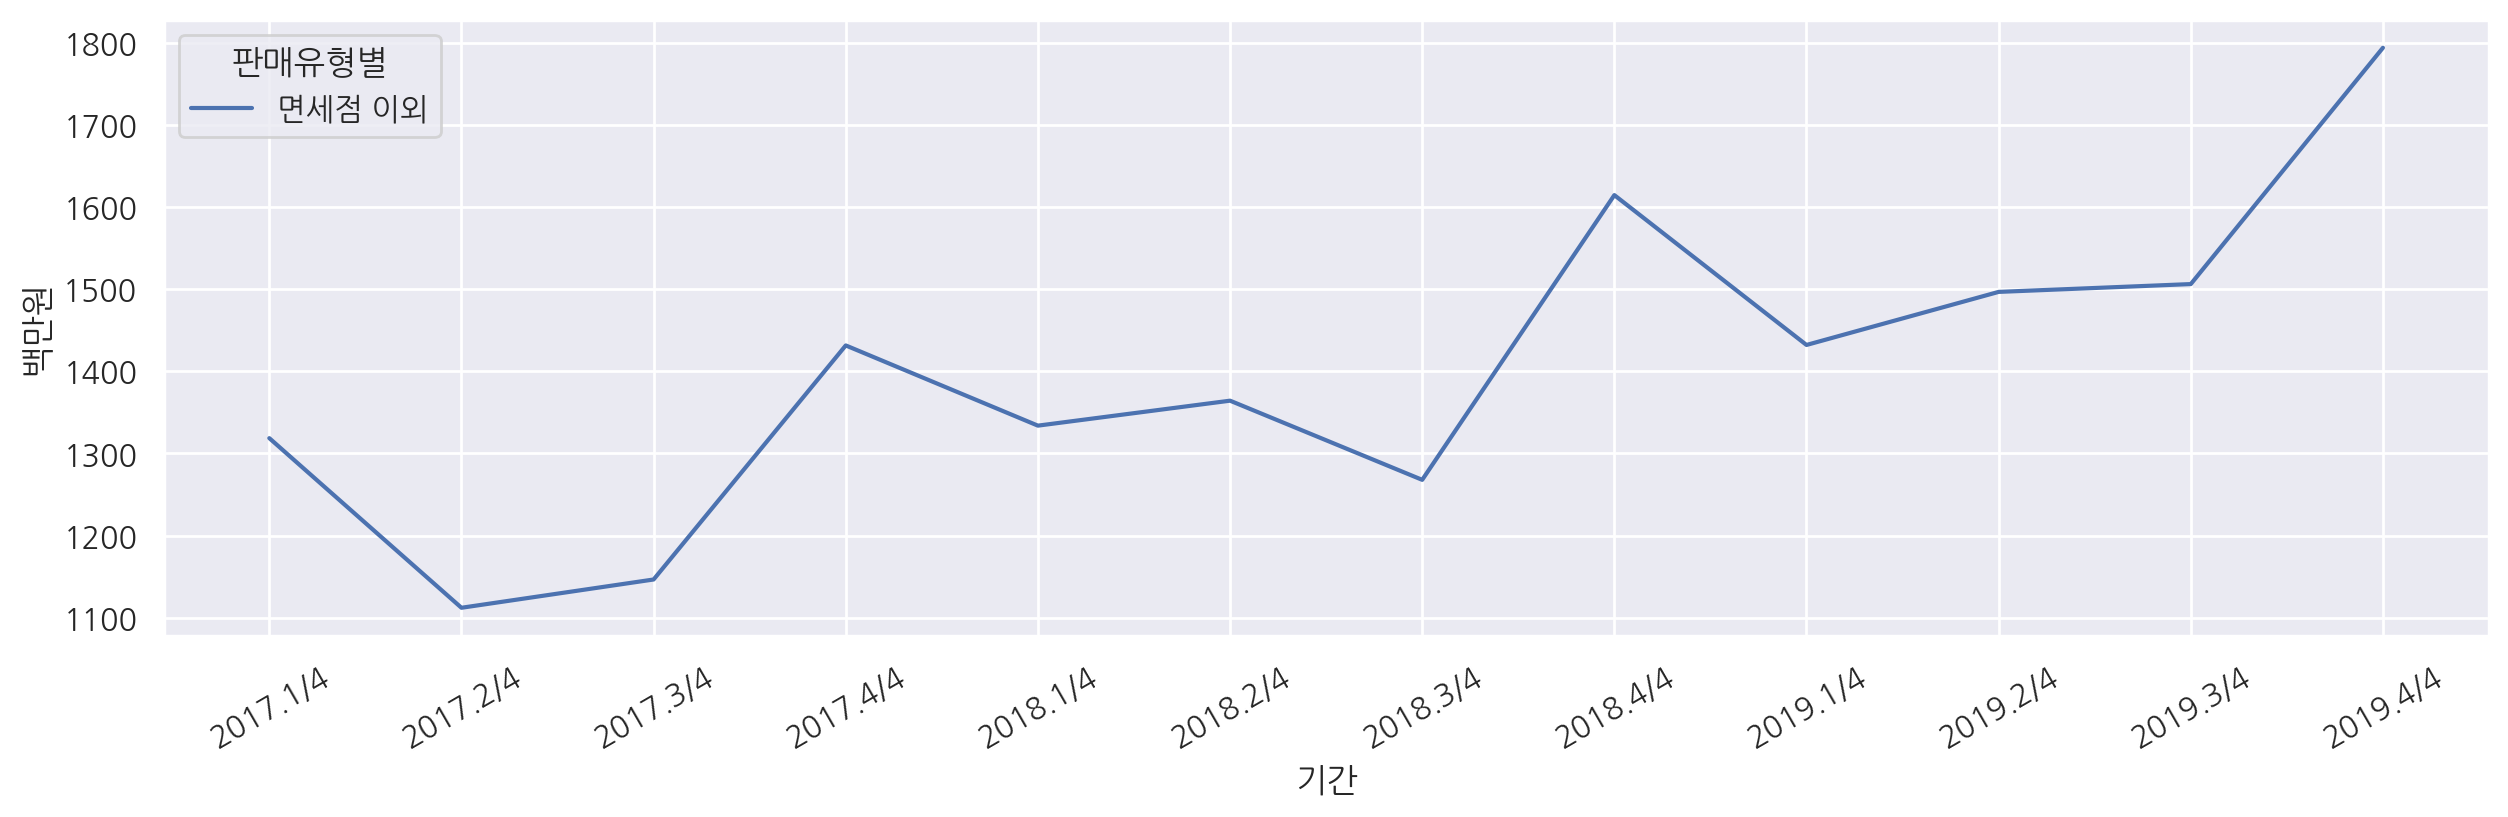

In [24]:
# 면세점 이외 값만 확인하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
df_no_duty = df[(df['판매유형별'] != '계') & (df['판매유형별'] != '면세점')].copy()
sns.lineplot(data=df_no_duty, x='기간', y='백만원', hue='판매유형별', ci=None)

### 의류 및 패션 관련 상품 온라인쇼핑 해외직접판매액

In [27]:
df["상품군별"].unique()

array(['컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구', '음반·비디오·악기',
       '의류 및 패션 관련상품', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품 및 자동차용품', '기 타'], dtype=object)

In [28]:
# df_fashion 이라는 변수에 의류 데이터만 가져와 따로 담아주기
df_fashion = df[df['상품군별'] == '의류 및 패션 관련상품'].copy()
df_fashion

국가(대륙)별          상품군별   판매유형별        기간      백만원    연도  분기
66         미국  의류 및 패션 관련상품       계  2014.1/4   9810.0  2014   1
67         미국  의류 및 패션 관련상품     면세점  2014.1/4      NaN  2014   1
68         미국  의류 및 패션 관련상품  면세점 이외  2014.1/4      NaN  2014   1
111        중국  의류 및 패션 관련상품       계  2014.1/4  12206.0  2014   1
112        중국  의류 및 패션 관련상품     면세점  2014.1/4      NaN  2014   1
...       ...           ...     ...       ...      ...   ...  ..
10732     대양주  의류 및 패션 관련상품     면세점  2019.4/4     12.0  2019   4
10733     대양주  의류 및 패션 관련상품  면세점 이외  2019.4/4    639.0  2019   4
10776      기타  의류 및 패션 관련상품       계  2019.4/4   1774.0  2019   4
10777      기타  의류 및 패션 관련상품     면세점  2019.4/4    302.0  2019   4
10778      기타  의류 및 패션 관련상품  면세점 이외  2019.4/4   1472.0  2019   4

[648 rows x 7 columns]

In [29]:
# df_fashion 이라는 변수에 판매액이 있는(계) 의류 데이터만 가져와 따로 담아주기
df_fashion = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] == '계')].copy()
df_fashion

국가(대륙)별          상품군별 판매유형별        기간      백만원    연도  분기
66             미국  의류 및 패션 관련상품     계  2014.1/4   9810.0  2014   1
111            중국  의류 및 패션 관련상품     계  2014.1/4  12206.0  2014   1
156            일본  의류 및 패션 관련상품     계  2014.1/4  13534.0  2014   1
201    아세안(ASEAN)  의류 및 패션 관련상품     계  2014.1/4   3473.0  2014   1
246      유럽연합(EU)  의류 및 패션 관련상품     계  2014.1/4   1364.0  2014   1
...           ...           ...   ...       ...      ...   ...  ..
10596    유럽연합(EU)  의류 및 패션 관련상품     계  2019.4/4    862.0  2019   4
10641          중동  의류 및 패션 관련상품     계  2019.4/4    251.0  2019   4
10686         중남미  의류 및 패션 관련상품     계  2019.4/4    124.0  2019   4
10731         대양주  의류 및 패션 관련상품     계  2019.4/4    651.0  2019   4
10776          기타  의류 및 패션 관련상품     계  2019.4/4   1774.0  2019   4

[216 rows x 7 columns]

<Axes: xlabel='기간', ylabel='백만원'>

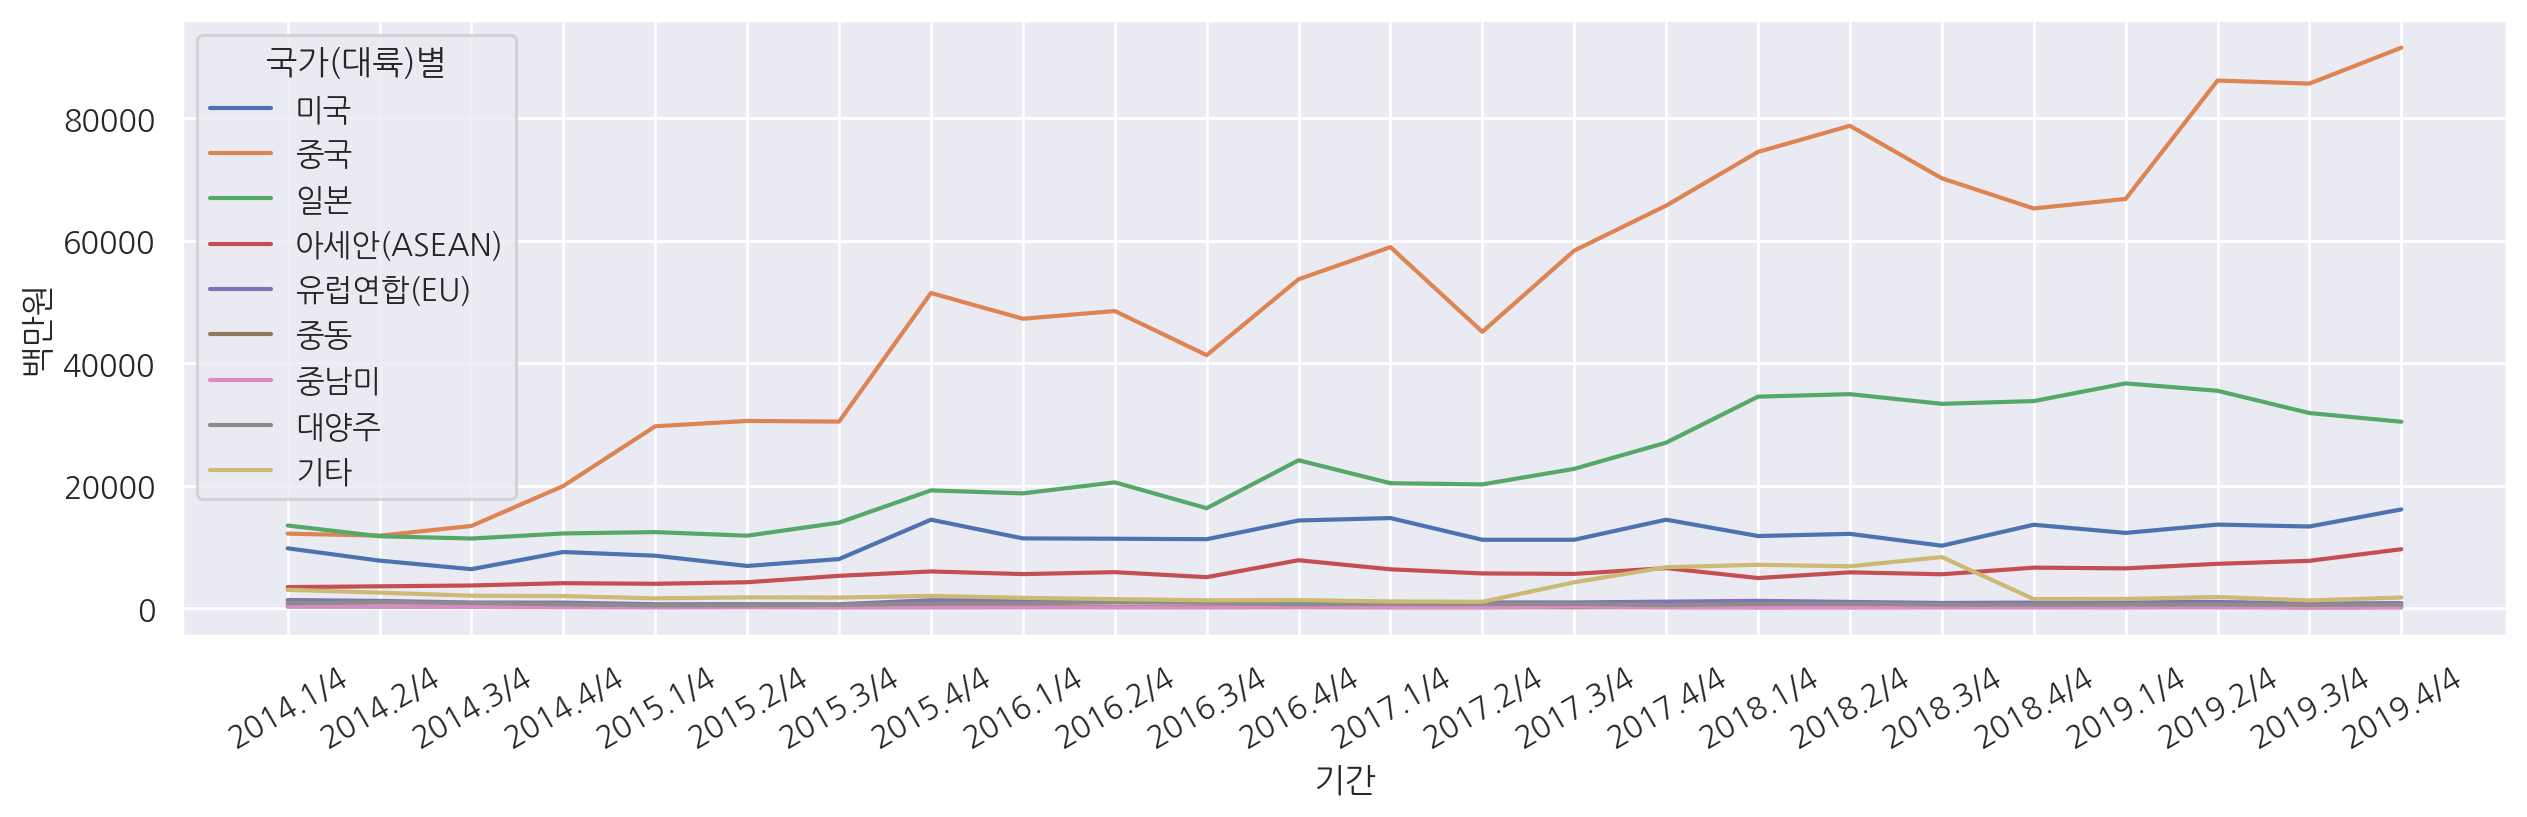

In [33]:
# '의류 및 패션 관련상품' 판매액에 대한 기간 별 금액 데이터를 시각화하고,
# '국가(대륙)별'로 다른 색상으로 표시하기

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간', y='백만원', hue='국가(대륙)별')

-> 의류 및 패션 관련 상품에서는 중국과 일본의 판매액이 가장 크게 성장하고 있다.  

<ipython-input-34-07fa60edf6f5>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_fashion2, x='기간', y='백만원', hue='판매유형별', ci=None)


<Axes: xlabel='기간', ylabel='백만원'>

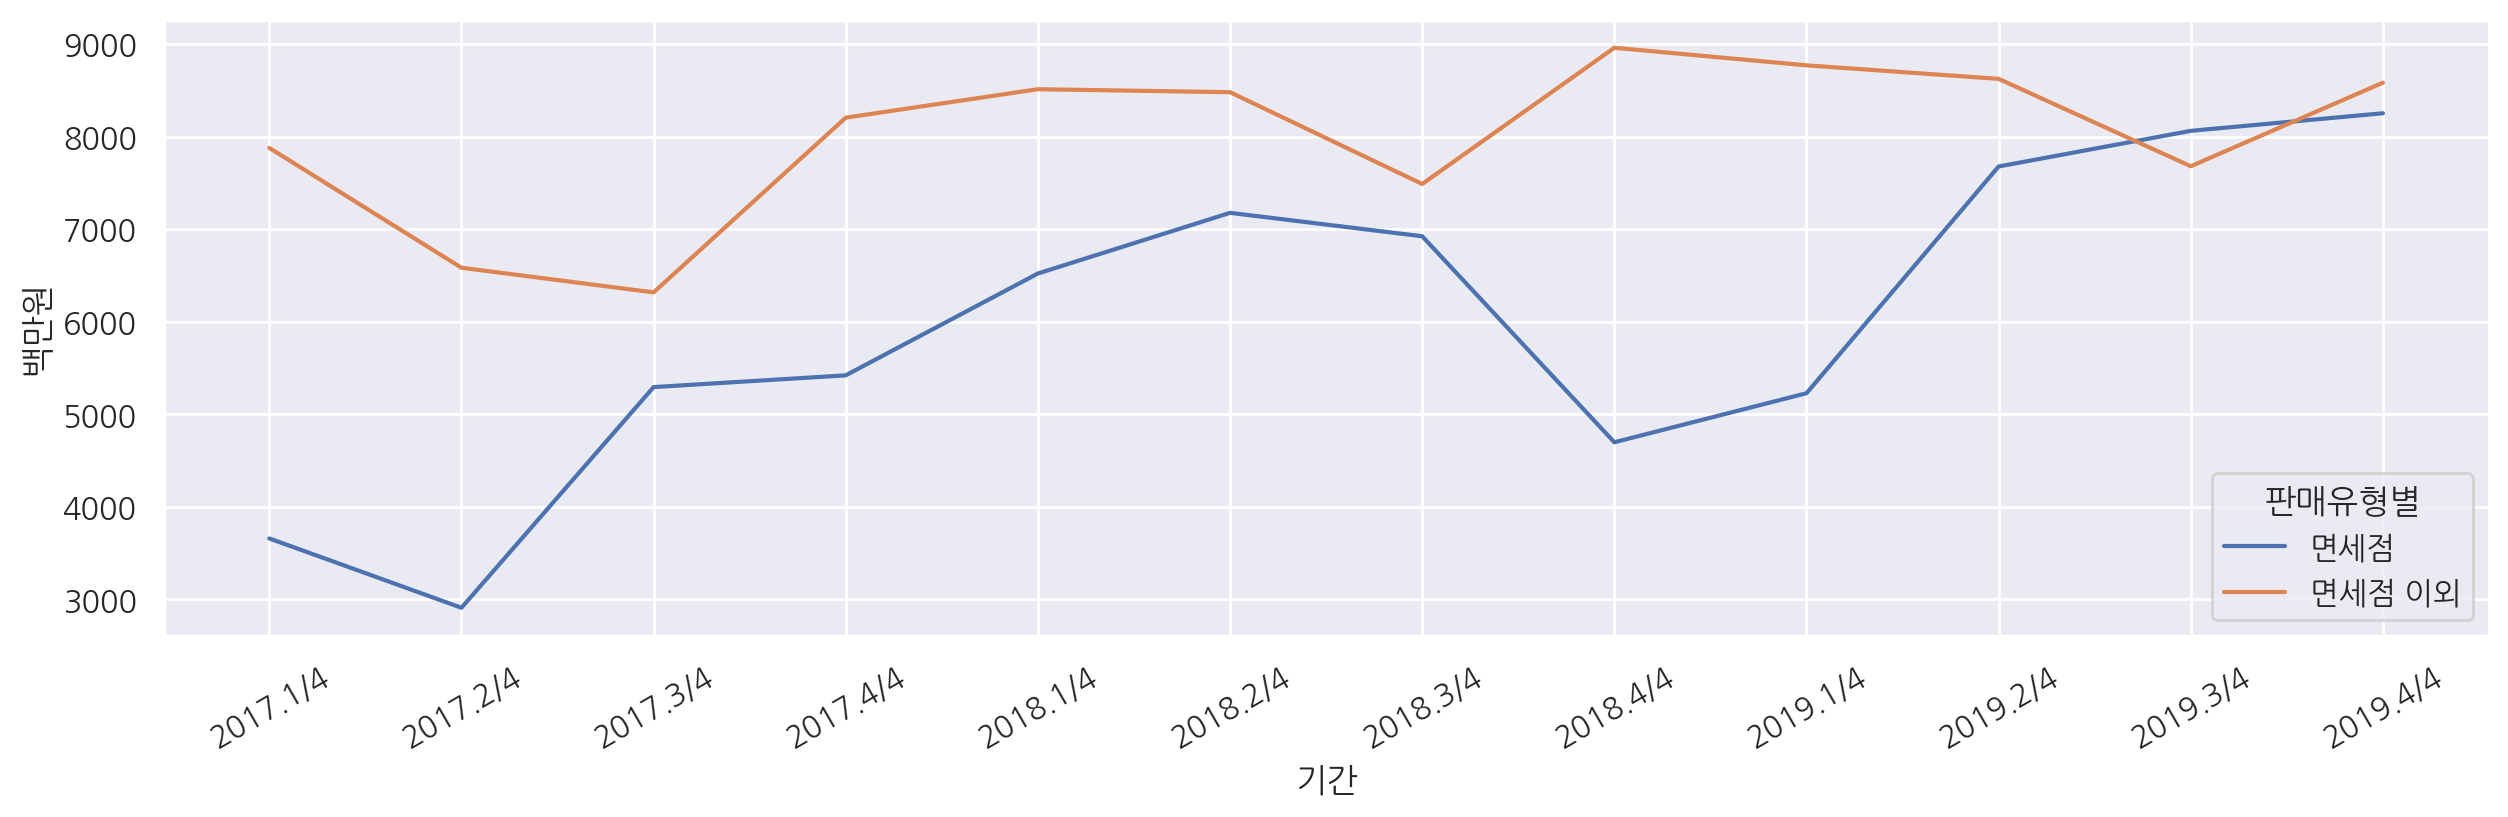

In [34]:
# '의류 및 패션 관련상품' 판매액에 대한 기간 별 금액 데이터를 시각화하고,
# '판매유형별'로 다른 색상으로 표시하기

df_fashion2 = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] != '계')].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x='기간', y='백만원', hue='판매유형별', ci=None)

-> '판매유형별'이 '계'가 아닌, 즉 '면세점', '면세점 이외'인 경우 2017년부터의 데이터만 존재한다. (2016년까지의 데이터는 결측치)  
-> '면세점 이외' 판매액이 '면세점'에 비해 전반적으로 상회하고 있다.  
-> '면세점'과 '면세점 이외'의 판매액 모두 꾸준히 상승해왔다.

### 데이터 집계하기
- 연도별, 국가별 판매액의 분포를 확인합니다.

In [41]:
# pivot_table 도움말 살펴보기
df_fashion.pivot_table?

- 데이터 살펴보기

In [37]:
df_fashion

국가(대륙)별          상품군별 판매유형별        기간      백만원    연도  분기
66             미국  의류 및 패션 관련상품     계  2014.1/4   9810.0  2014   1
111            중국  의류 및 패션 관련상품     계  2014.1/4  12206.0  2014   1
156            일본  의류 및 패션 관련상품     계  2014.1/4  13534.0  2014   1
201    아세안(ASEAN)  의류 및 패션 관련상품     계  2014.1/4   3473.0  2014   1
246      유럽연합(EU)  의류 및 패션 관련상품     계  2014.1/4   1364.0  2014   1
...           ...           ...   ...       ...      ...   ...  ..
10596    유럽연합(EU)  의류 및 패션 관련상품     계  2019.4/4    862.0  2019   4
10641          중동  의류 및 패션 관련상품     계  2019.4/4    251.0  2019   4
10686         중남미  의류 및 패션 관련상품     계  2019.4/4    124.0  2019   4
10731         대양주  의류 및 패션 관련상품     계  2019.4/4    651.0  2019   4
10776          기타  의류 및 패션 관련상품     계  2019.4/4   1774.0  2019   4

[216 rows x 7 columns]

In [39]:
df_fashion['판매유형별'].value_counts()

판매유형별
계    216
Name: count, dtype: int64

#### pivot_table을 사용하는 2가지 방법
1. 데이터프레임명을 앞에 쓰기  
데이터프레임명.pivot_table(index='aa', ...)  
2. 데이터프레임명을 () 안에 쓰기   
  pd.pivot_table(데이터프레임명, index='aa', ...)

In [40]:
# pivot_table 로 '국가(대륙)별', '연도' 별 합계 금액을 표 형태로 구하기

result = df_fashion.pivot_table(index='국가(대륙)별', columns='연도', values='백만원', aggfunc='sum')
result

연도             2014      2015      2016      2017      2018      2019
국가(대륙)별                                                              
기타           9683.0    7248.0    5918.0   13192.0   23901.0    6475.0
대양주          3392.0    2349.0    3401.0    2716.0    2725.0    2489.0
미국          33223.0   38066.0   48451.0   51638.0   47875.0   55536.0
아세안(ASEAN)  14936.0   19639.0   24478.0   24297.0   23068.0   31247.0
유럽연합(EU)     4485.0    3374.0    4899.0    4091.0    4114.0    3694.0
일본          48960.0   57594.0   79905.0   90531.0  136800.0  134637.0
중국          57531.0  142339.0  190932.0  228330.0  288848.0  330267.0
중남미           975.0     616.0     649.0     772.0     576.0     544.0
중동           1172.0    1018.0     968.0     808.0     879.0     951.0

### 연산결과를 시각적으로 보기
heatmap에서  
- 많을수록 색을 진하게 표시할 때는 _r 붙이기 : ex. cmap='Blues_r'
- 숫자값 소수점 아래 표시 없이 표기하기 : ex. fmt='.0f'

<Axes: xlabel='연도', ylabel='국가(대륙)별'>

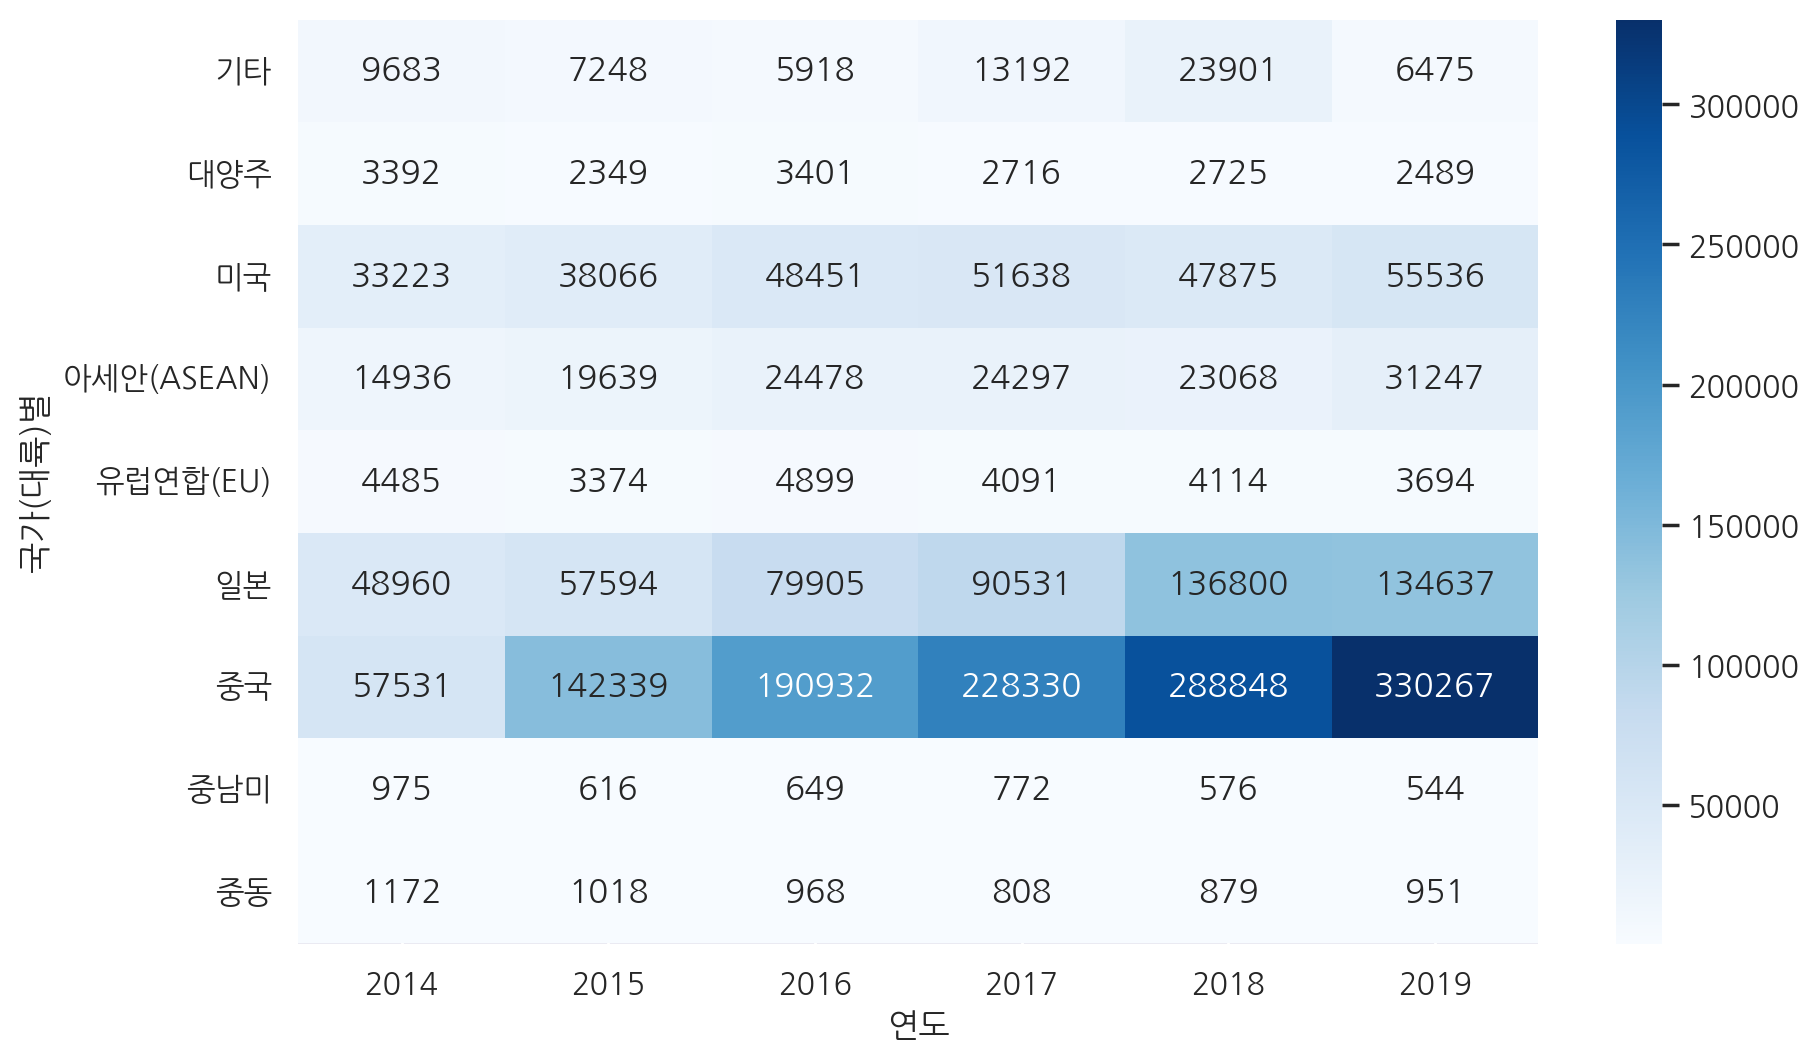

In [44]:
# pivot_table로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현하기

plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap='Blues', annot=True, fmt='.0f')

-> 중국에서 판매액이 가장 많다.  
-> 일본과 미국에서의 판매액이 증가하고 있다.  

- heatmap을 사용하면 연도, 대륙 별 분포를 색상으로 편하게 볼 수 있다. (pivot_table로는 직관적으로 확인이 어려움)

## 8. 결론 : 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

In [45]:
df_total

국가(대륙)별          상품군별 판매유형별        기간     백만원    연도  분기
48         미국    컴퓨터 및 주변기기     계  2014.1/4  2216.0  2014   1
51         미국    가전·전자·통신기기     계  2014.1/4  2875.0  2014   1
54         미국         소프트웨어     계  2014.1/4    47.0  2014   1
57         미국           서 적     계  2014.1/4   962.0  2014   1
60         미국         사무·문구     계  2014.1/4    25.0  2014   1
...       ...           ...   ...       ...     ...   ...  ..
10785      기타       아동·유아용품     계  2019.4/4   193.0  2019   4
10788      기타         음·식료품     계  2019.4/4   319.0  2019   4
10791      기타         농축수산물     계  2019.4/4     2.0  2019   4
10794      기타  생활용품 및 자동차용품     계  2019.4/4   531.0  2019   4
10797      기타           기 타     계  2019.4/4  1094.0  2019   4

[3024 rows x 7 columns]

<Axes: xlabel='연도', ylabel='백만원'>

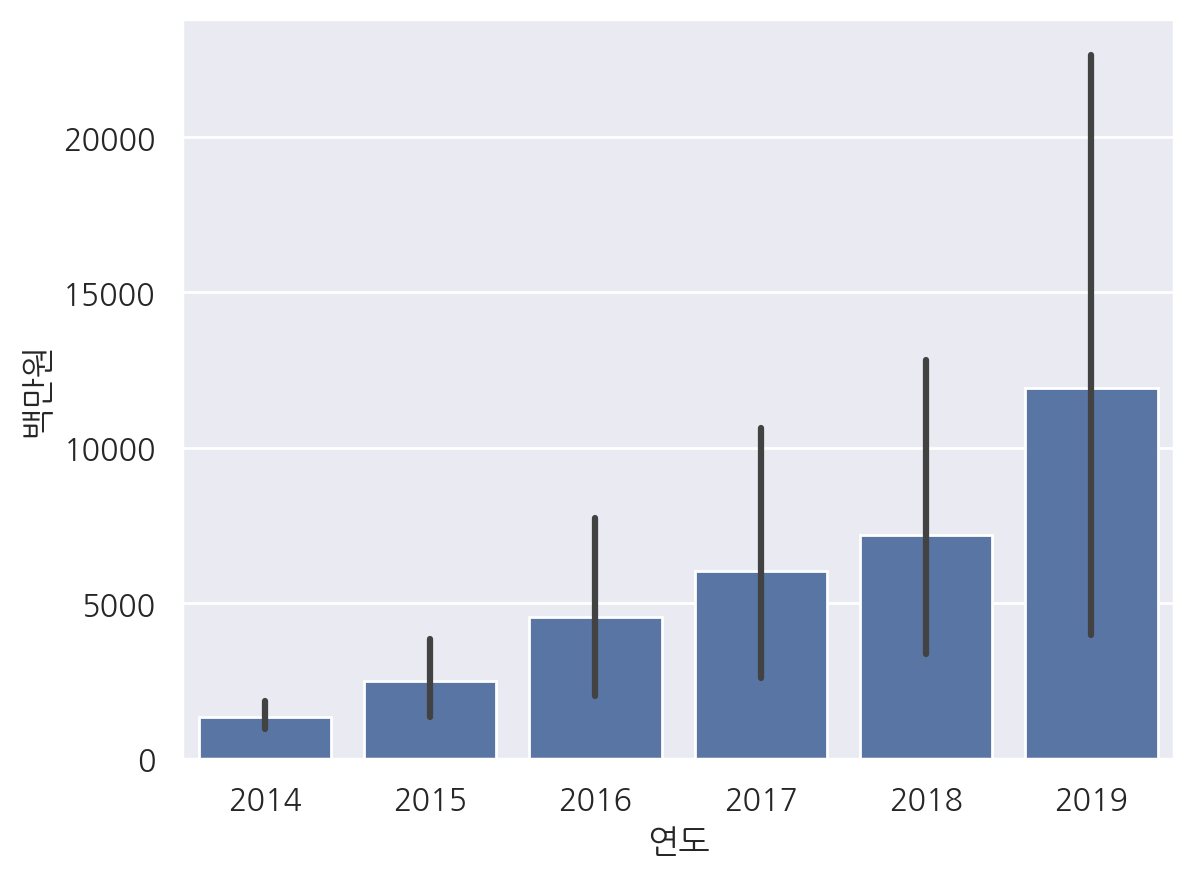

In [46]:
# 위에서 판매유형별 데이터의 '계'만 모은 df_total 변수를 활용해 연도별 합계 금액을 시각화 하기

sns.barplot(data=df_total, x='연도', y='백만원')

<Axes: xlabel='연도', ylabel='백만원'>

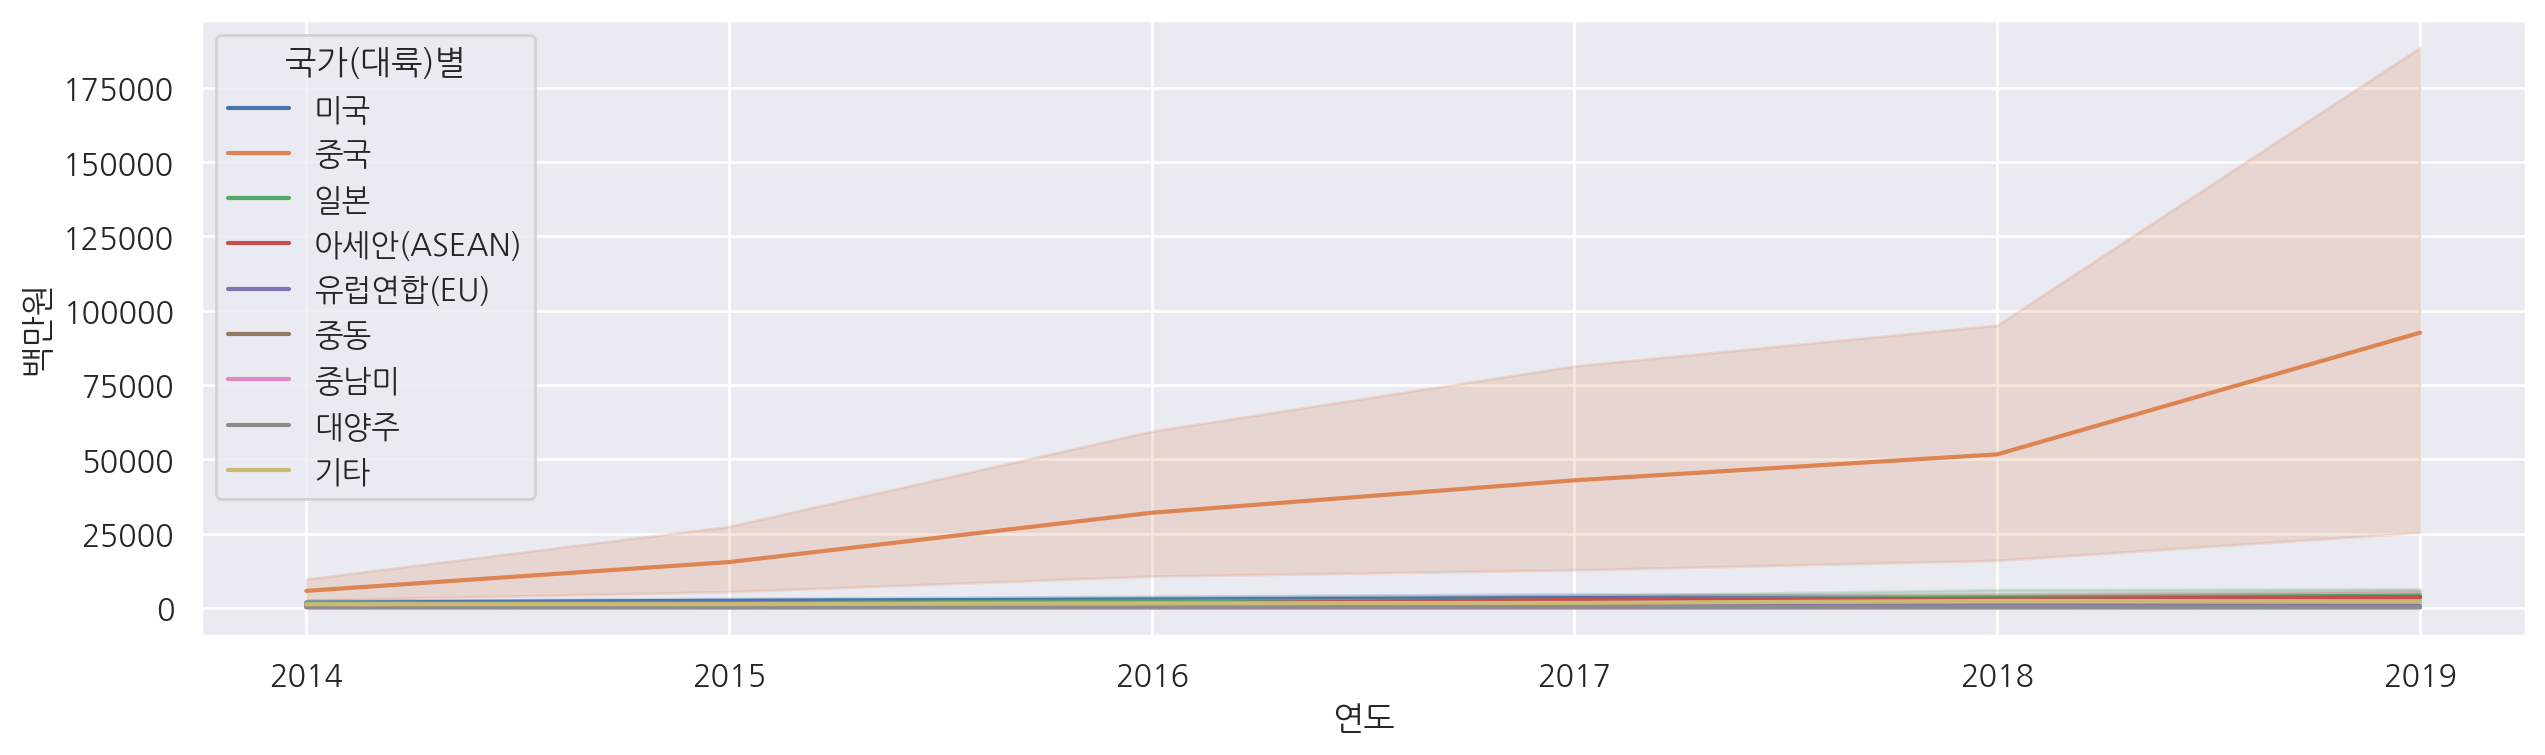

In [50]:
# 연도별 판매액을 그리고, '국가(대륙)별'로 다른 색상으로 표현하기

plt.figure(figsize=(15, 4))
sns.lineplot(df_total, x='연도', y='백만원', hue='국가(대륙)별')

-> 중국 판매액이 크게 성장했으며, 중국 외 국가들도 미세하게 증가함을 보인다.

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

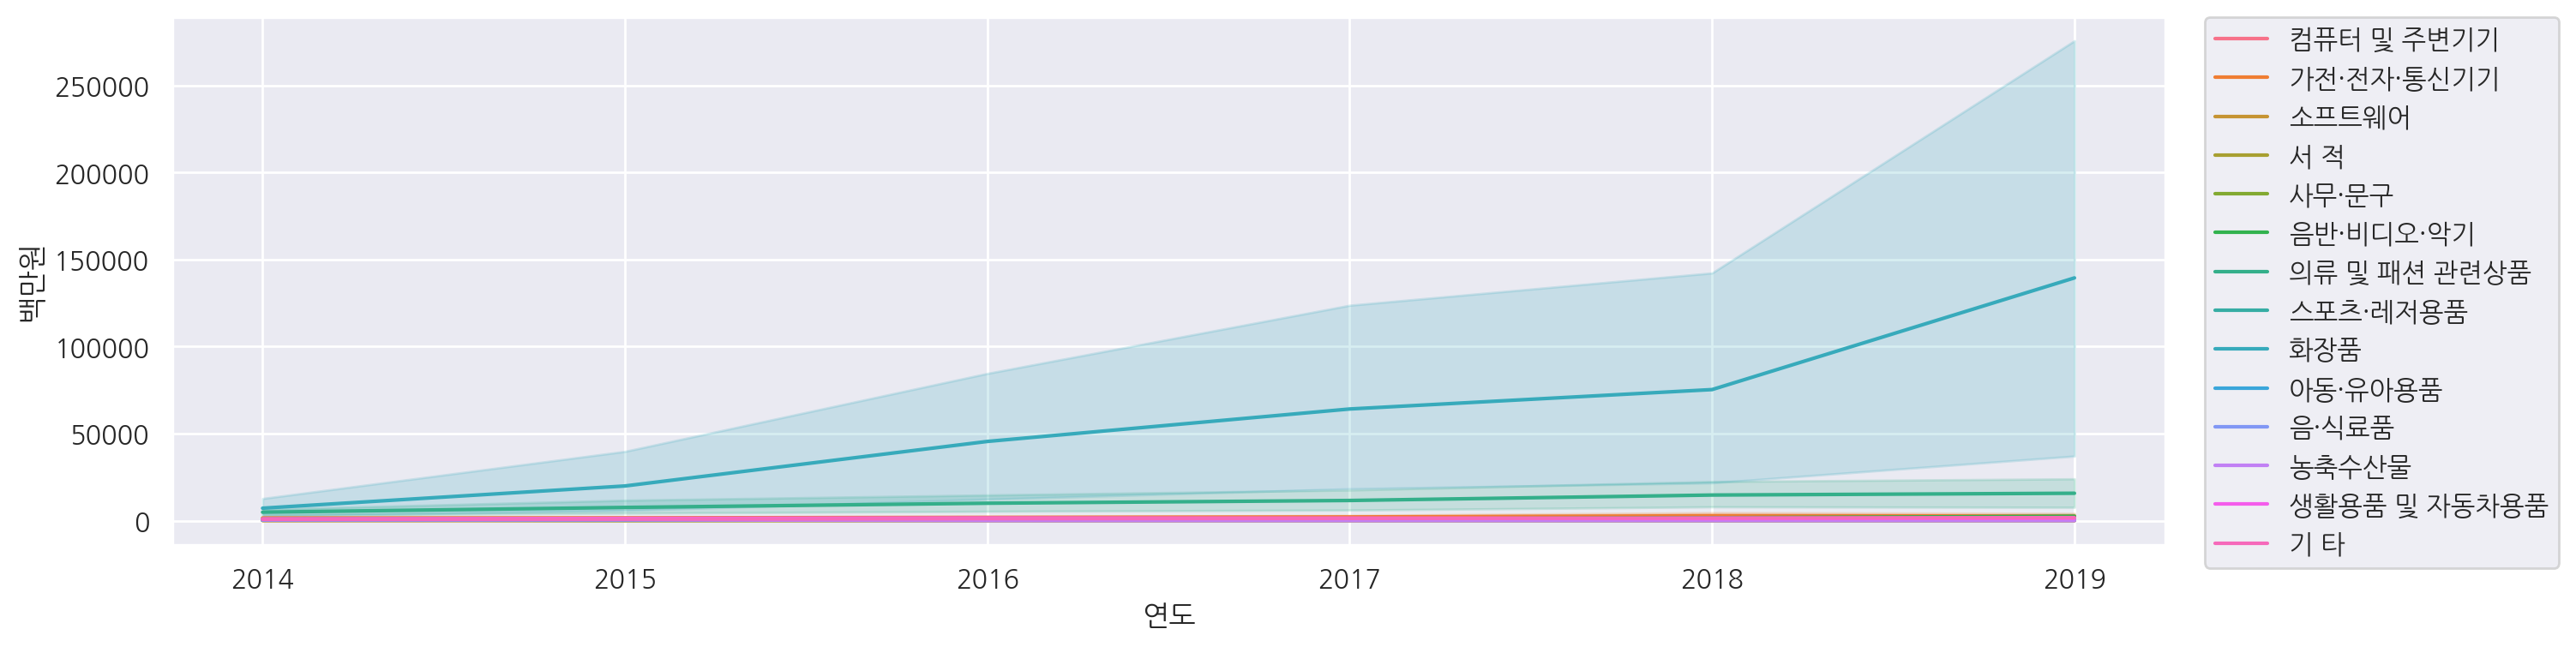

In [54]:
# 연도별 판매액을 그리고 '상품군별'로 다른 색상으로 표현하기

plt.figure(figsize=(15, 4))
sns.lineplot(df_total, x='연도', y='백만원', hue='상품군별')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### 검증 목표 : K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?

### 검증 결과 : K-Beauty 판매액이 꾸준히 성장하고 있으며, 판매액 절대치가 높고 크게 성장하고 있는 중국에 직접 판매를 하는 것이 가장 유리하다. (판매액 기준)

## 회고
- KEEP :
    - 처음보는 함수의 개념을 명확히 이해하고, 나름의 방식으로 정리했다.
    - 처음보는 함수의 옵션을 도움말을 직접 켜서 살펴보고 적용해보았다.
    - 강의 영상을 듣고 끝나면 바로 복습했다.
- PROBLEM : 어떤 내용을 검증할 때 어떤 함수와 시각화 방식이 적절한지 더 많은 경험과 연습이 필요하다.
- TRY : 관심있는 데이터를 활용하여, 다양한 방식으로 데이터를 분석해보자!